# Verkennende analyse Ames Housing dataset

In dit notebook doen we een verkennende analyse op de gehele Ames Housing dataset. De Ames Housing dataset bevat data over huizen in Boston, met name ook de verkoopprijs. Het is een aangepaste versie van een dataset die vaak gebruikt wordt om regressiemodellen (om de verkoopprijs mee te voorspellen) te benchmarken.

De dataset kun je vinden op Kaggle: [https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

Wij doen de verkennende analyse met als doel ons voor te bereiden op het maken van een machine learning model dat de verkoopprijs (SalePrice) voorspelt.

We zetten de verkennende analyse systematisch op door naar de volgende onderwerpen te kijken:
- Data en metadata
- De afhankelijke variabele SalePrice
- De onafhankelijke variabelen
- Relaties tussen de onafhankelijke variabelen
- Relaties tussen de afhankelijke variabele SalePrice enerzijds en de onafhankelijke variabelen anderzijds

Tenslotte eindigen we met een conclusie waar we de bevindingen die relevant zijn voor het voorspellen van de SalePrice met machine learning.

We beginnen zoals gebruikelijk met de import statements.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

import itertools

## Data en metadata

Hieronder lezen we de dataset in en tonen we enkele rijen.

In [2]:
ames_housing_data = pd.read_csv("data/ames_housing.csv")
ames_housing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We willen ook wat informatie over het dataframe.

In [3]:
ames_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Wat opvalt is dat het veel variabelen zijn, 80. Daarom is het wat lastig om een data dictionary te maken. Bovendien zijn alle variabelen al beschreven in het bestand data_description.txt.

Van die 80 variabelen is er de afhankelijke variabele SalePrice en de rest zijn onafhankelijke variabelen.

We doorlopen de data description om de variabelen in te delen in de volgende soorten:
- Nominale variabelen zoals bijvoorbeeld GarageType
- Ordinale categorische variabelen zoals bijvoorbeeld ExterQual
- Ordinale numerieke variabelen zoals bijvoorbeeld OverallQual
- Ratio numerieke variabelen zoals bijvoorbeeld GrLivArea (hierbij doen we ook discrete numerieke variabelen die wel een nulpunt hebben zoals bijvoorbeeld GarageCars, het aantal auto's dat in de garage past)
- Datum variabelen zoals bijvoorbeeld YrSold

Deze indeling helpt om het verkennen van de afzonderlijke variabelen systematisch op te zetten. Terzijde: later in de verkennende analyse en ook als we gaan machine learnen willen we een eenvoudigere opdeling: categorisch en numeriek.

In [4]:
nom_vars = ["MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "Utilities", "LotConfig", "Neighborhood",
            "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir", "Electrical", "GarageType", "PavedDrive", "MiscFeature", "SaleType", "SaleCondition"]

ord_cat_vars = ["LotShape", "LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence"]

ord_num_vars = ["OverallQual", "OverallCond"]

ratio_num_vars = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
                  "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

date_vars = ["YearBuilt", "YearRemodAdd", "MoSold", "YrSold", "GarageYrBlt"]

## De afhankelijke variabele SalePrice

We bekijken het histogram van de variabele SalePrice.

<Axes: xlabel='SalePrice', ylabel='Count'>

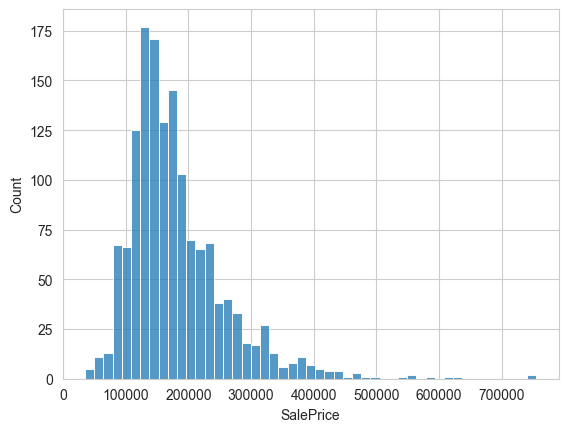

In [5]:
sns.histplot(ames_housing_data, x="SalePrice")

SalePrice is rechts-scheef verdeeld. Het is daarom mogelijk verstandig een log transformatie te doen.

## De afzonderlijke onafhankelijke variabelen

In deze paragraaf verkennen we afzonderlijke onafhankelijke variabelen.
- We gaan eerst de soorten variabelen langs zoals we ze hierboven hebben ingedeeld.
- Vervolgens vereenvoudigen we de indeling in categorische en numerieke variabelen.
- Dan kijken we naar missing values en de manier waarop we die kunnen vullen.
- Tenslotte bekijken (en verwijderen) we een aantal variabelen die bijna altijd dezelfde waarde hebben.

Omdat we veel variabelen hebben is het handig om een functie te hebben die in één keer voor een lijst variabelen de frequentieverdeling plot in een grote matrix van grafieken.

In [6]:
# Deze functie plot frequentieverdelingen van variabelen in een matrix.
# - Het var_type kan zijn: 'nom', 'ord_cat', 'ord_num' of 'ratio_num'
# - In ord_cat_var_orders kun je de sortering van ordinale categorische variabelen meegeven
# als dictionary met als key de variabele naam en als value de lijst waarden op volgorde.
# - Met de vlag remove_outliers kun je bij numerieke variabelen de grootste 10 waarden weglaten.
def plot_frequencies(data, vars, var_type, num_cols = 5, ord_cat_var_orders=None, remove_outliers=False):
    num_rows = len(vars) // num_cols
    # Als het aantal variabelen niet deelbaar is door het aantal kolommen
    # dan is er een extra rij nodig.
    if len(vars) % num_cols != 0:
        num_rows += 1

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(num_cols * 3, num_rows * 3))

    for i, var in enumerate(vars):
        row = i // num_cols
        col = i % num_cols
        if var_type == "nom" or var_type == "ord_num":
            sns.countplot(ax=ax[row][col], data=data, x=var)
        elif var_type == "ord_cat":
            sns.countplot(ax=ax[row][col], data=data, x=var, order=ord_cat_var_orders[var])
        elif var_type == "num":
            if remove_outliers:
                largest_indices = data.nlargest(columns=var, n=10).index
                # De ~ zorgt ervoor dat we alles nemen behalve de tien grootste.
                sns.histplot(ax=ax[row][col], data=data[~data.index.isin(largest_indices)], x=var)
            else:
                sns.histplot(ax=ax[row][col], data=data, x=var)
        else:
            raise Exception("Unknown var type {}". format(var_type))

        # draai de x-labels als er meer dan 5 labels zijn
        if len(ax[row][col].get_xticklabels()) > 5:
            ax[row][col].tick_params(axis='x', labelrotation=90)

    plt.tight_layout()
    plt.show()

### Nominale variabelen

Dit zijn de frequentieverdelingen van de nominale variabelen.

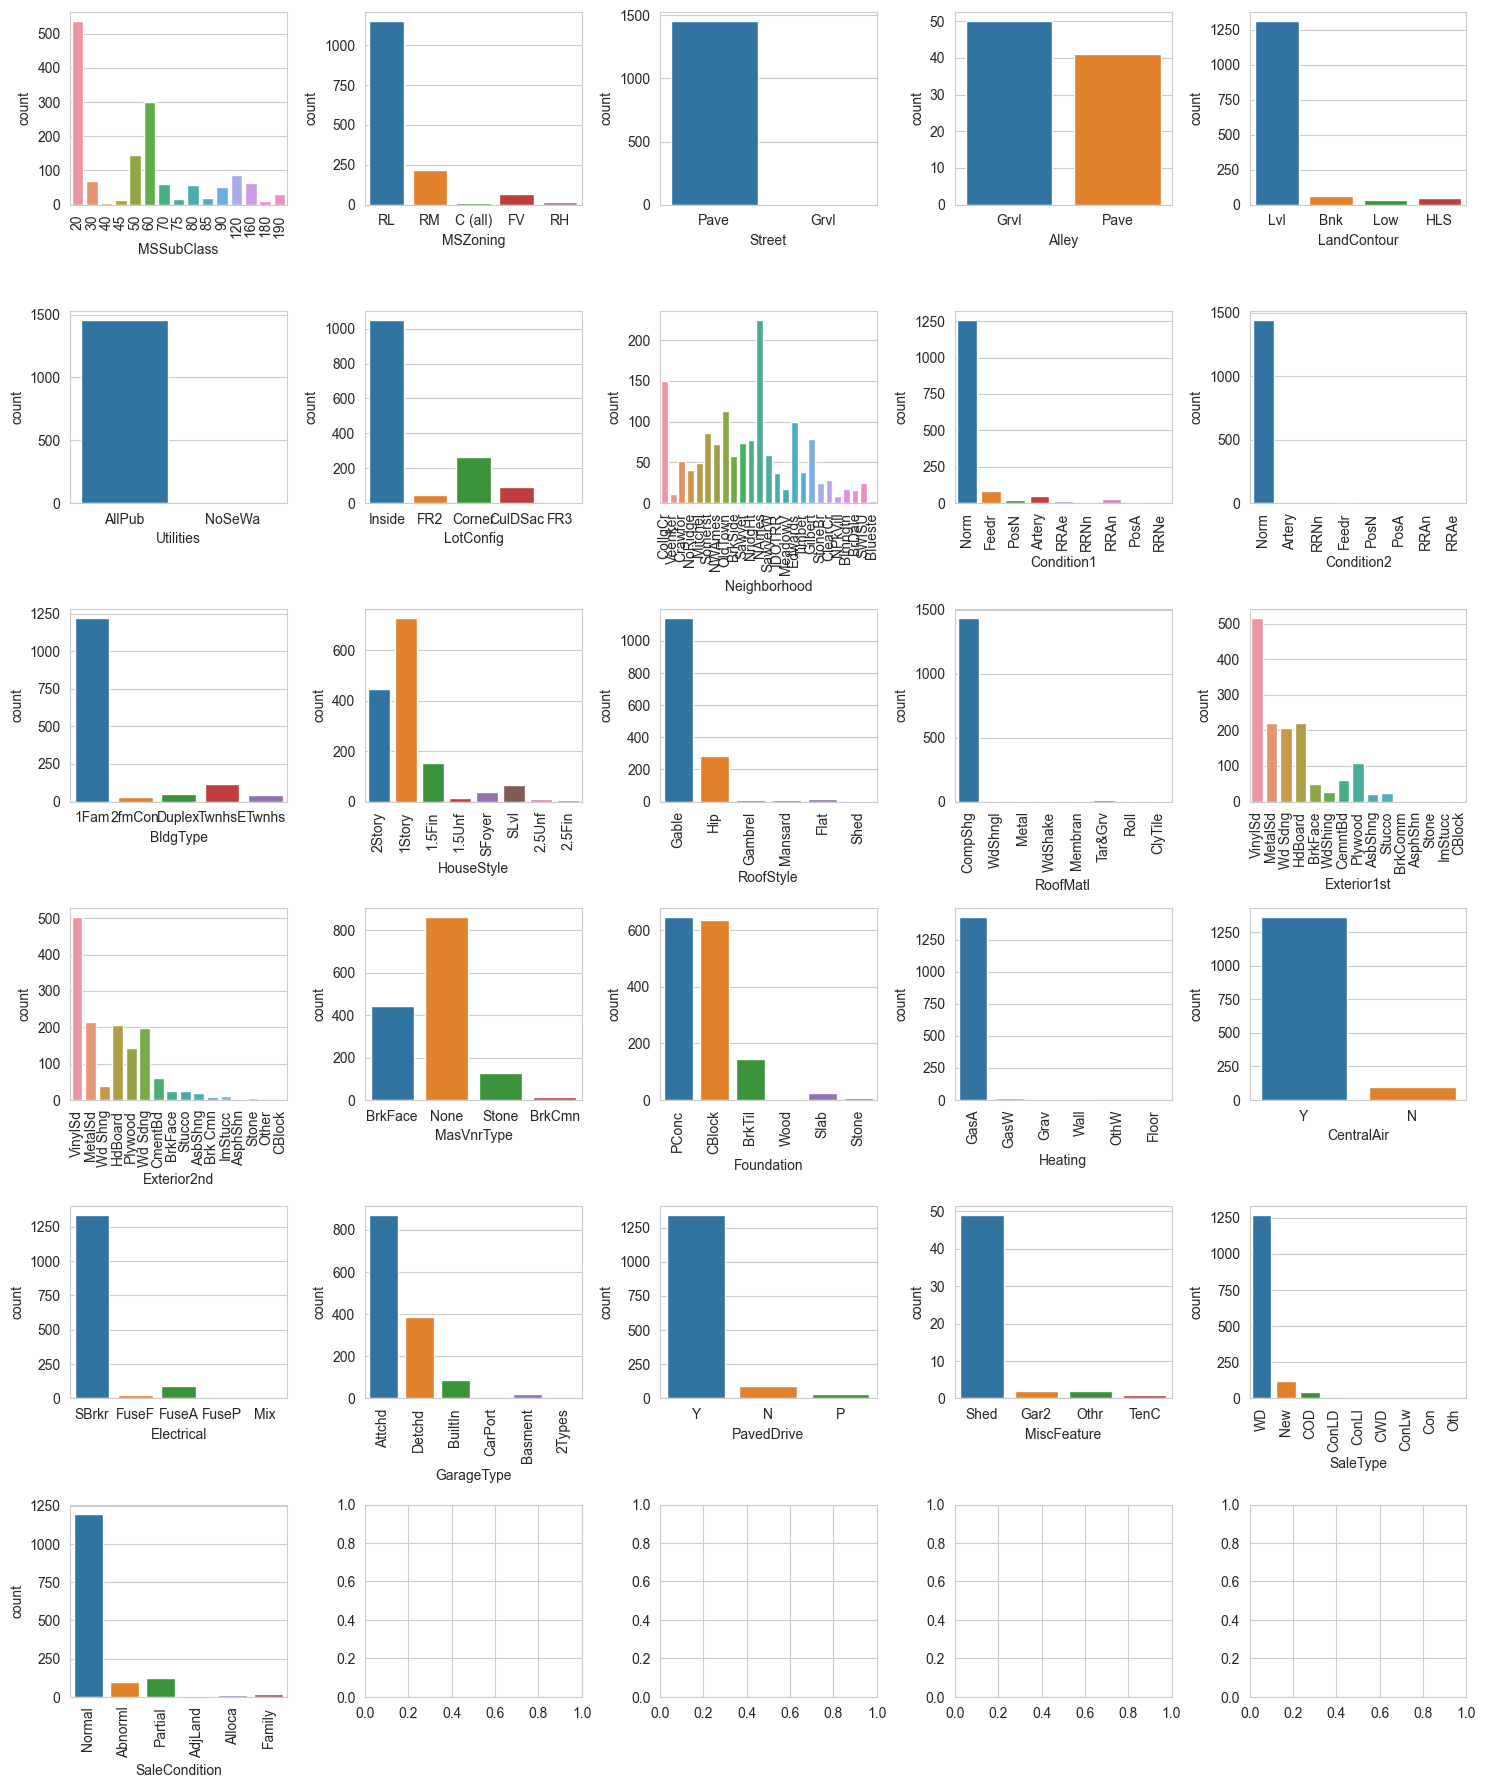

In [7]:
plot_frequencies(ames_housing_data, nom_vars, "nom")

Wat opvalt is dat er aardig wat variabelen zijn waar één waarde sterk overheerst. Bijvoorbeeld Street, Utilities en Heating. We bekijken er eentje, Utilities, wat nader.

In [8]:
ames_housing_data[ames_housing_data["Utilities"] == "NoSeWa"]
ames_housing_data["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

We bekijken de omschrijving van deze variabele in de data description:

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

Dus er is één huis met alleen electriciteit en gas in de dataset. De waarden Nosewr en ELO komen helemaal niet voor. Omdat op één huis na alle huizen dezelfde waarde hebben voor Utilities is deze variabele niet veelzeggend. Het maakt geen onderscheid. Voor een machine learning model is deze variabele ook niet bruikbaar.

Het is misschien wel interessant om het ene huis met NoSeWa te bekijken:

In [9]:
ames_housing_data[ames_housing_data["Utilities"] == "NoSeWa"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


Daar is niet veel bijzonders aan te zien behalve misschien de SaleCondition en SaleType.

### Ordinale categorische variabelen

We willen de grafieken met frequentieverdelingen zien. Maar dan hebben we wel graag de waarden op de goede volgorde staan. Daarom maken we een dictionary waarin we die volgorden vastleggen. Dat is later ook handig als we de ordinale categorische variabelen gaan coderen.

In [10]:
ord_cat_var_orders = {
    "LotShape": ['Reg', 'IR1', 'IR2', 'IR3'],
    "LandSlope": ['Gtl', 'Mod', 'Sev'],
    "ExterQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "ExterCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtExposure": ['No', 'Mn', 'Av', 'Gd'],
    "BsmtFinType1": ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtFinType2": ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "HeatingQC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "Functional": ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
    "FireplaceQu": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageFinish": ['Unf', 'RFn', 'Fin'],
    "GarageQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "PoolQC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "Fence": ['MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}

Nu kunnen we de eerder gedefineerde functie gebruiken om de frequentieverdelingen te plotten. Bovenstaand dictionary geven we mee om de volgorde van de labels aan te geven.

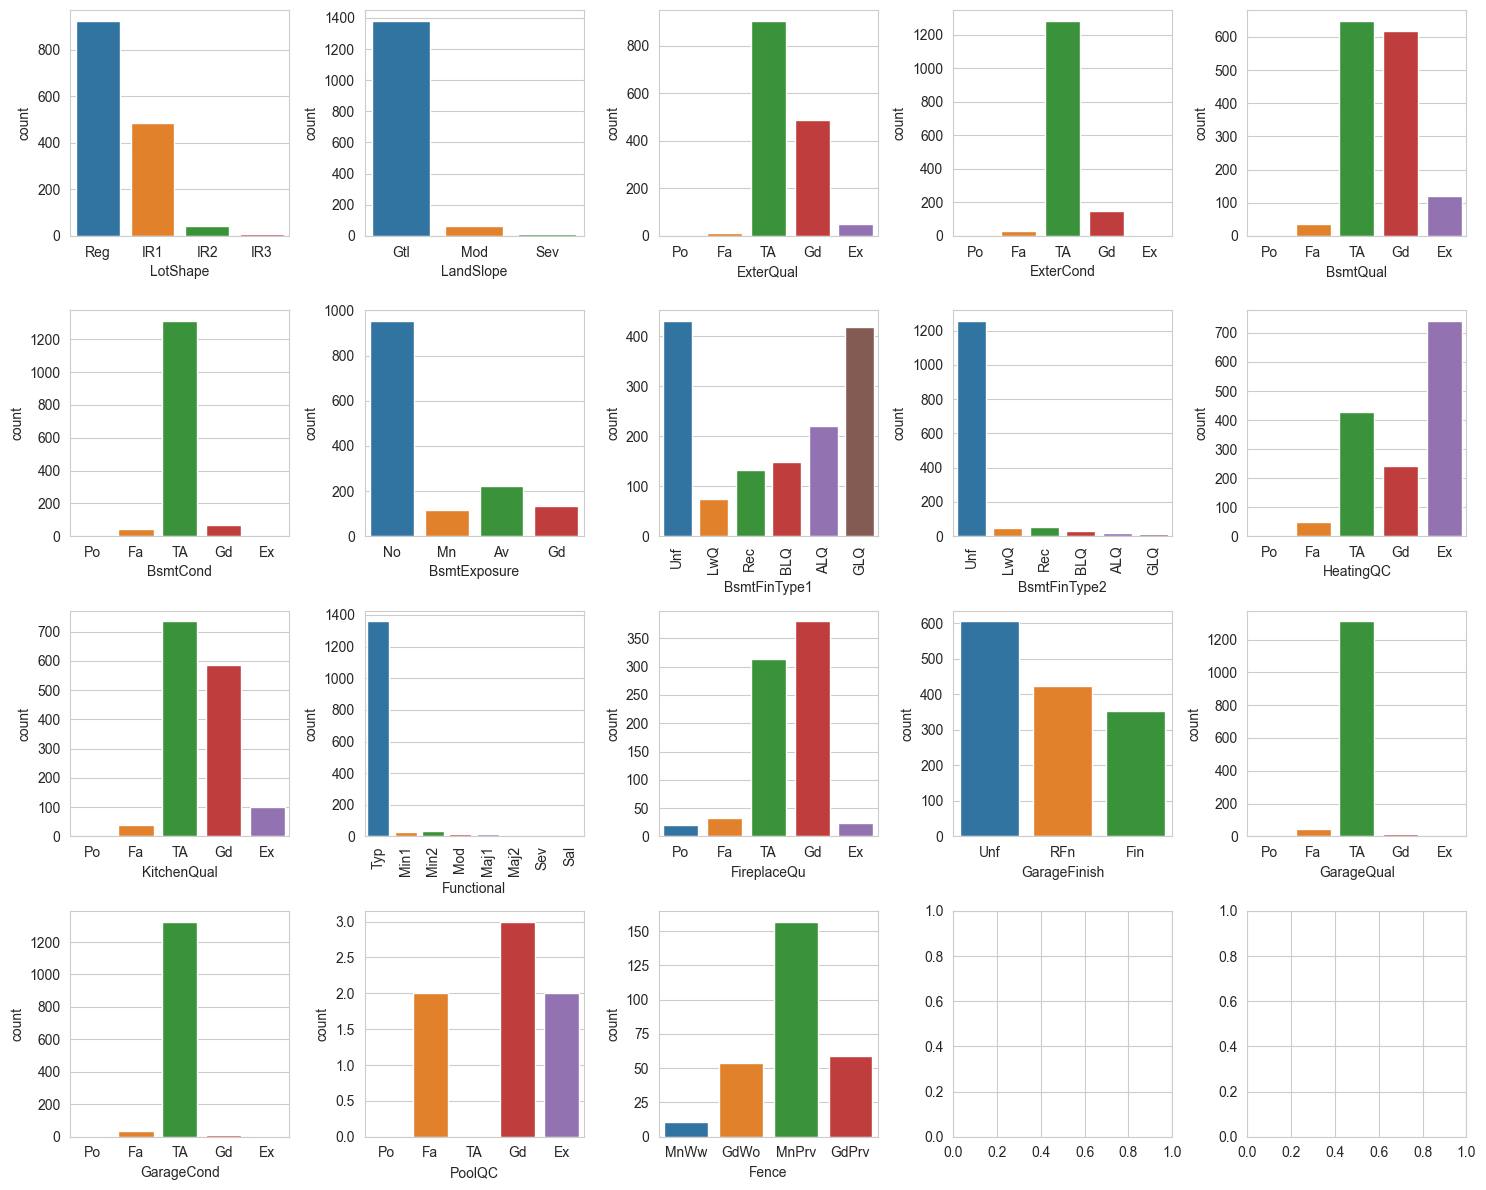

In [11]:
plot_frequencies(ames_housing_data, ord_cat_vars, var_type="ord_cat", ord_cat_var_orders=ord_cat_var_orders)

Om te beginnen valt op dat geen enkele variabelen de indruk wekt normaal verdeeld te zijn. Dat zou een reden kunnen zijn om deze variabelen tijdens de preparation niet met een sklearn StandardScaler te scalen maar met een MinMaxScaler.

Daarnaast ook hier weer variabelen waar één waarde sterk overheerst. Bijvoorbeeld BsmtFinType2.

### Ordinale numerieke variabelen

Er zijn twee ordinale numerieke variabelen. Laten we ook daar de frequentieverdelingen van bekijken.

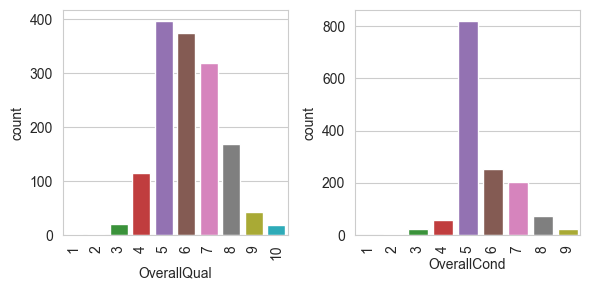

In [12]:
plot_frequencies(ames_housing_data, ord_num_vars, var_type="ord_num", num_cols=2)

Deze variabelen ogen dan weer wel normaal verdeeld.

### Numerieke ratio variabelen

We bekijken de frequentieverdeling van de numerieke ratio variabelen.

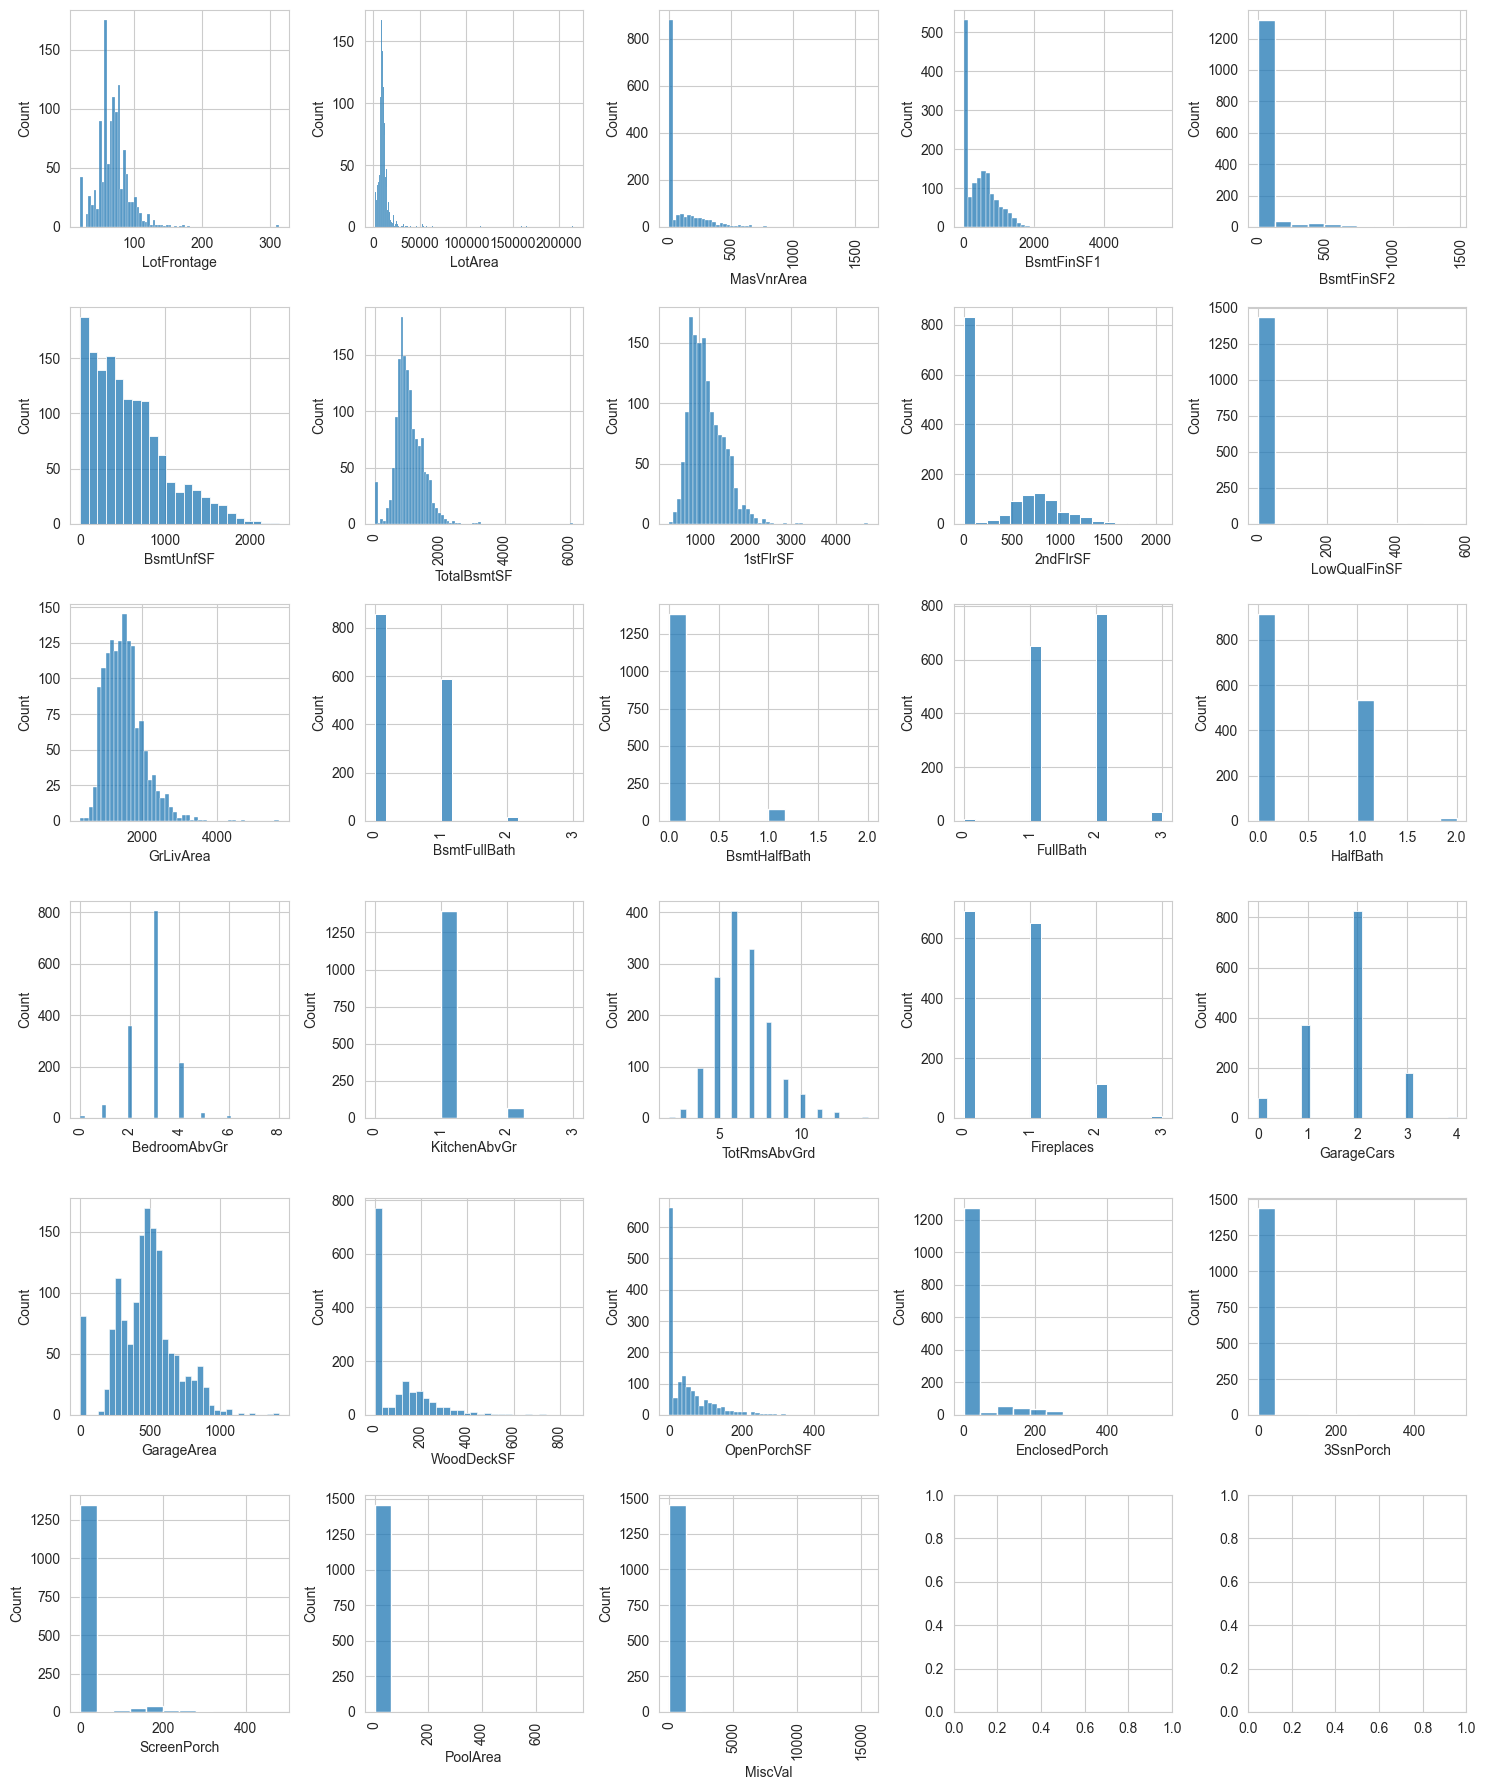

In [13]:
plot_frequencies(ames_housing_data, ratio_num_vars, var_type="num")

Een aantal van de grafieken zijn wat moeilijk te bekijken vanwege extreme outliers. LotArea valt bijvoorbeeld op. Laten we voor alle grafieken de outliers eruit halen.

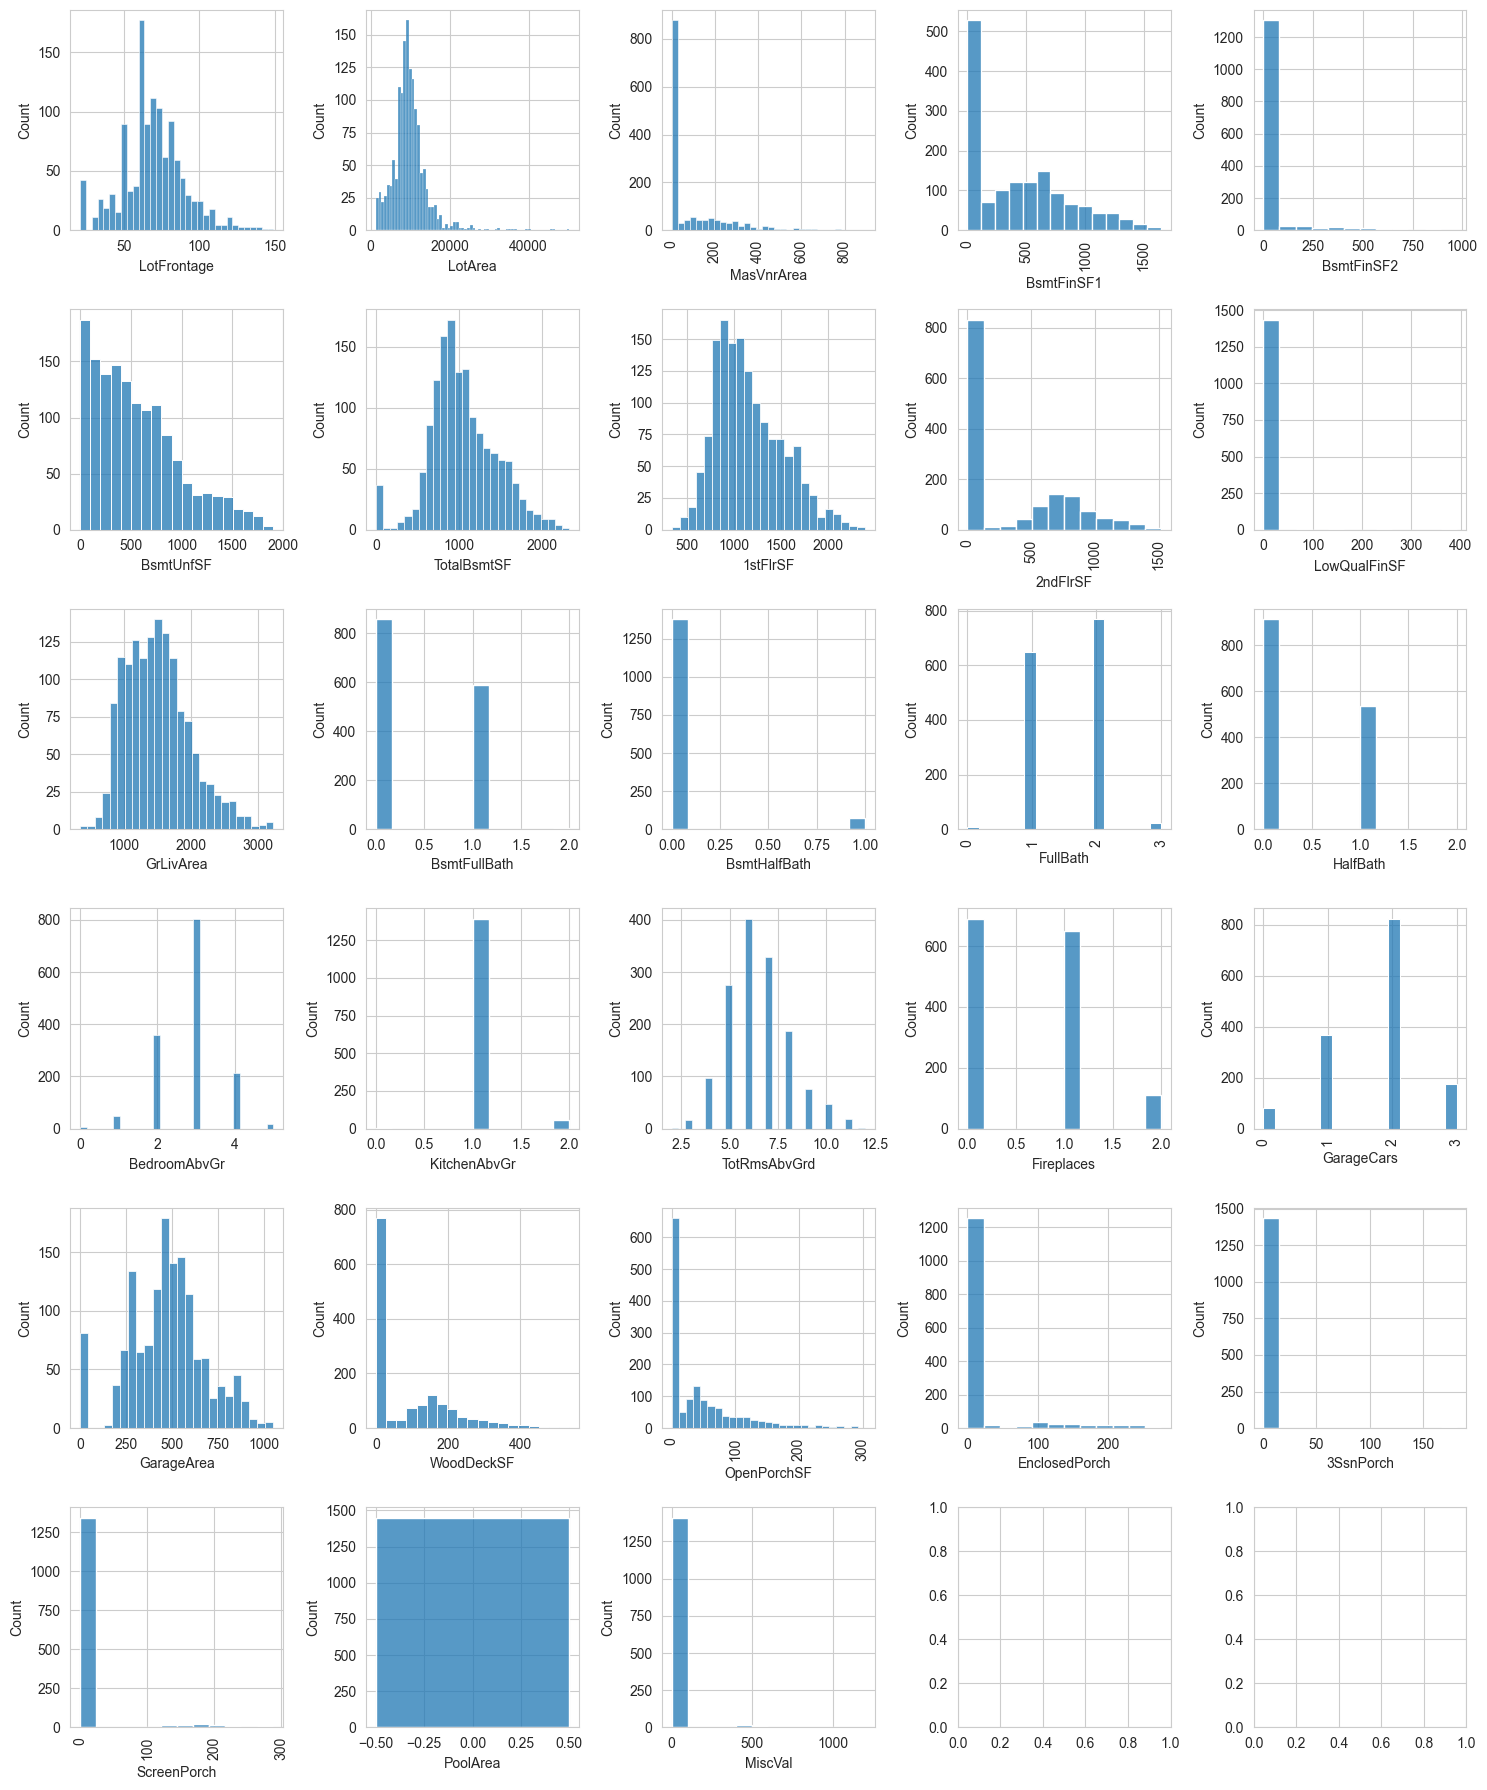

In [14]:
plot_frequencies(ames_housing_data, ratio_num_vars, var_type="num", remove_outliers=True)

Er vallen een aantal dingen op:
- Sommige variabelen zijn rechts-scheef verdeeld, bijvoorbeeld LotArea.
- Er zijn een aantal variabelen met een uitschieter bij 0. Bijvoorbeeld MasVnrArea en BsmtFinSF1. De 0 betekent dan dat er (respectievelijk) geen metselwerk of kelder is. Dat vraag om aandacht bij het scalen van de variabelen omdat de uitschieters de normale verdeling verstoren.
- Er zijn ook hier weer een aantal variabelen waar één waarde erg dominant is. Bijvoorbeeld ScreenPorch.

Laten we wat preciezer zijn over de scheefheid. Hieronder maken we een tabel met per variabele de scheefheid. We berekenen de scheefheid twee keer: eentje met alle waarden, eentje zonder de 0 waarden.

In [15]:
skewness_wo_zeros = []
skewness_alls = []
for var in ratio_num_vars:
    # Bereken de scheefheid zonder 0-waarden
    non_zero_vals = ames_housing_data[var][ames_housing_data[var] != 0]
    skewness_wo_zero = round(non_zero_vals.skew(), 2)

    # Bereken de scheefheid met alle waarden
    skewness_all = round(ames_housing_data[var].skew(), 2)

    # Werk de lijsten bij.
    skewness_wo_zeros.append(skewness_wo_zero)
    skewness_alls.append(skewness_all)

# Zet de lijsten in een dataframe en sorteer.
skewness_df = pd.DataFrame({"Variabele": ratio_num_vars,
                            "Scheefheid": skewness_alls,
                            "Scheefheid zonder 0-waarden": skewness_wo_zeros})
skewness_df.sort_values("Scheefheid zonder 0-waarden", ascending=False)

,Variabele,Scheefheid,Scheefheid zonder 0-waarden
1,LotArea,12.21,12.21
11,BsmtFullBath,0.60,6.62
14,HalfBath,0.68,6.55
12,BsmtHalfBath,4.10,6.28
27,MiscVal,24.48,5.06
16,KitchenAbvGr,4.49,4.66
3,BsmtFinSF1,1.69,2.30
22,OpenPorchSF,2.36,2.25
18,Fireplaces,0.65,2.17
6,TotalBsmtSF,1.52,2.17


Bovenstaande tabel kan helpen bij het normaliseren en schalen van de numerieke variabelen. We zouden ervoor kunnen kiezen om variabelen met een scheefheid boven een bepaalde treshold een log-transformatie te geven.

### Datum variabelen

Dan hebben we nog een aantal variabelen met datums erin. We kijken weer naar de frequentieverdeling.

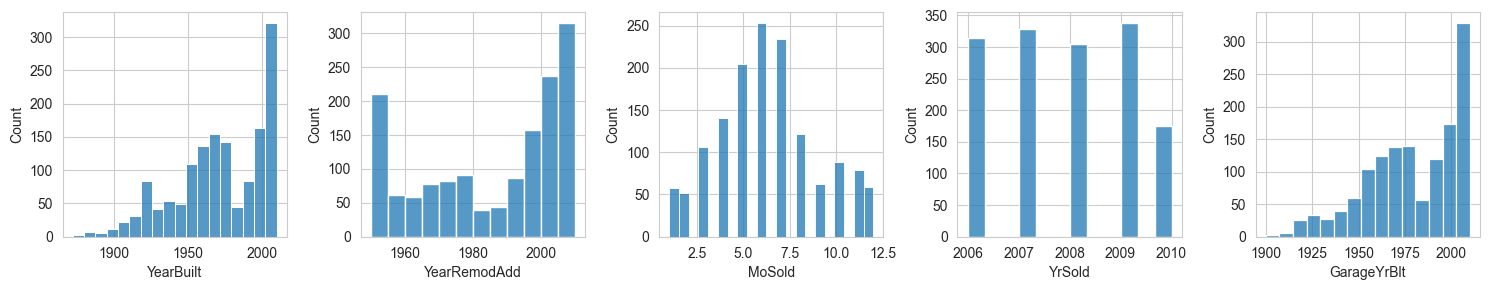

In [16]:
plot_frequencies(ames_housing_data, date_vars, var_type="num")

Er vallen een aantal dingen op.

Over YearRemodAdd lezen we:

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

Dan is het opvallend dat die pas zo'n beetje in 1950 beginnen en dat daar ook een uitschieter zit. Een mogelijke verklaring is dat we dat moeten lezen als '1950 of vroeger', misschien omdat eerder geen administratie werd bijgehouden.

MoSold en YrSold zou je natuurlijk samen kunnen nemen. Want dan kun je de ontwikkeling, met name van de SalePrice, in de tijd bekijken. Hier kunnen we later verder naar kijken als we de variabelen gaan vergelijken met de SalePrice.

Tenslotte valt op dat de data niet normaal verdeeld is. Over de vraag of MoSold normaal verdeeld is kun je twisten. Ik vind van niet.

### Herindeling: categorisch en numeriek

Voor het vervolg van de analyse en later ook voor machine learning is het handig om een meer eenvoudige indeling te hebben, te weten categorisch of numeriek. Daarom doen we het volgende:
- We noemen de nominale variabelen: categorische variabelen.
- We gaan de ordinale categorische variabelen coderen naar integers.
- We noemen de gecodeerde ordinale categorische variabelen, de ordinale numerieke variabelen, de ratio numerieke variabelen en de datum varianbelen allemaal: numerieke variabelen.

Dat betekent dat we werk hebben, namelijk het coderen van ordinale numerieke variabelen. We gebruiken het dictionary ord_cat_var_orders dat we eerder hebben gedefinieerd. We zetten de transformatie om te coderen op als een sklearn Estimator-Transformer. Die kunnen we dan later opnemen in een sklearn PipeLine.

In [17]:
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, ord_cat_vars, ord_cat_var_orders):
        self.ord_cat_vars = ord_cat_vars
        self.ord_cat_var_orders = ord_cat_var_orders

    def fit(self, X, y=None):
        # Er valt niets te fitten.
        return self

    def transform(self, X, y=None):
        for var in self.ord_cat_vars:
            # In ord_cat_var_orders[var] vinden we een gesorteerde lijs met waarden.
            # Bijvoorbeeld ['Po', 'Fa', 'TA', 'Gd', 'Ex'] voor de variabele ExterQual
            # We willen dat omzetten naar een mapper die er zo uit ziet:
            # {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
            # Merk op dat we beginnen bij 1 en niet bij 0. De 0 gebruiken we later voor missing values.
            ordered_categories = self.ord_cat_var_orders[var]
            # We zetten het dictionary op met list comprehension.
            mapper = {cat: i + 1 for i, cat in enumerate(ordered_categories)}
            # Tenslotte voeren we de codering daadwerkelijk uit.
            X[var] = X[var].map(mapper)
        return X

customOrdinalEncoder = CustomOrdinalEncoder(ord_cat_vars, ord_cat_var_orders)

# In notebooks loop je vaak/soms tegen het volgende probleem aan:
# - Als je een cell twee keer runt dan werkt ie de tweede keer niet meer. Je
# codeert bijvoorbeeld eerst 'TA' naar 3 en dan bij de tweede keer probeert de mapper 3 te coderen
# maar daar heeft die geen waarde voor en dan staat je notebook vol met NaNs.
# - Als je cell runt dan wordt die (vaak op onverwachte wijze) beïnvloed door
# andere cellen die je gerund hebt. Dit gebeurt met name als je een cell opnieuw runt terwijl
# je de cellen eronder al gerund hebt.
# Dit is gedoe. Vaak moet je dan alle cellen opnieuw runnen vanaf boven naar beneden.
# Bij een klein notebook gaat dat nog wel. Maar bij een grote zoals deze is dat echt lastig.
#
# Wat je eigenlijk wilt:
# - Je kunt een cell herhaaldelijk runnen en dat heeft iedere keer hetzelfde resultaat.
# - Je wilt dat een cell niet beïnvloed wordt door de werking van onderstaande cellen.
#
# Dat is als volgt op te lossen als je transformaties doet op een dataframe:
# - Kopieer het dataframe voordat je transformeert. Estimator-Transformers bewerken
# heel vaak het dataframe dat ze meekrijgen 'in place'. Zo ook de CustomOrdinalEncoder hierboven.
# Als je een kopie meegeeft dan blijft het oorspronkelijke dataframe intact.
# - Zet het resultaat in een nieuw dataframe. Gebruik elke dataframe naam maar een keer.
# Uiteindelijk heb je dan best veel kopieën van het dataframe in het geheugen. Bij deze
# dataset levert dat geen problemen op. Bij grotere datasets kun je met samples werken.
#
# Hieronder pas ik de genoemde constructie toe. Je kunt deze cell zo vaak runnen als je wilt.
# En ames_housing_data blijft in zijn oorspronkelijke vorm.
ames_housing_data_ord_encoded = customOrdinalEncoder.fit_transform(ames_housing_data.copy())
ames_housing_data_ord_encoded[ord_cat_vars]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,1,1,4,3,4.0,3.0,1.0,6.0,1.0,5,4,1,NaN,2.0,3.0,3.0,NaN,NaN
1,1,1,3,3,4.0,3.0,4.0,5.0,1.0,5,3,1,3.0,2.0,3.0,3.0,NaN,NaN
2,2,1,4,3,4.0,3.0,2.0,6.0,1.0,5,4,1,3.0,2.0,3.0,3.0,NaN,NaN
3,2,1,3,3,3.0,4.0,1.0,5.0,1.0,4,4,1,4.0,1.0,3.0,3.0,NaN,NaN
4,2,1,4,3,4.0,3.0,3.0,6.0,1.0,5,4,1,3.0,2.0,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,3,3,4.0,3.0,1.0,1.0,1.0,5,3,1,3.0,2.0,3.0,3.0,NaN,NaN
1456,1,1,3,3,4.0,3.0,1.0,5.0,3.0,3,3,2,3.0,1.0,3.0,3.0,NaN,3.0
1457,1,1,5,4,3.0,4.0,1.0,6.0,1.0,5,4,1,4.0,2.0,3.0,3.0,NaN,4.0
1458,1,1,3,3,3.0,3.0,2.0,6.0,3.0,4,4,1,NaN,1.0,3.0,3.0,NaN,NaN


(Sommige zijn integer en andere float. Dat kunnen we fixen, maar het is niet echt een probleem. Later bij machine learning gaan we we toch alles schalen en dan worden het allemaal floats.) Het is fijn om wat hierboven staat te vergelijken met de oorspronkelijke waarden:

In [18]:
ames_housing_data[ord_cat_vars]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,NaN,RFn,TA,TA,NaN,NaN
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,Typ,TA,RFn,TA,TA,NaN,NaN
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,NaN,NaN
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Typ,Gd,Unf,TA,TA,NaN,NaN
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,Typ,TA,RFn,TA,TA,NaN,NaN
1456,Reg,Gtl,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,Min1,TA,Unf,TA,TA,NaN,MnPrv
1457,Reg,Gtl,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,Typ,Gd,RFn,TA,TA,NaN,GdPrv
1458,Reg,Gtl,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,Typ,NaN,Unf,TA,TA,NaN,NaN


Dat ziet er goed uit. Nu kunnen we dan de vereenvoudigde indeling van variabelen maken. Behalve de lijsten cat_vars en num_vars maken we ook een lijst X_vars. Dat is de lijst van de cat_vars en num_vars samen. Dit zijn dan alle onafhankelijke variabelen. Het is dan ook gebruikelijk om X te gebruiken als naam voor het dataframe met de onafhankelijke variabelen en y voor het dataframe met de afhankelijke variabele(n).

In [19]:
cat_vars = nom_vars
num_vars = ratio_num_vars + ord_cat_vars + ord_num_vars + date_vars
X_vars = cat_vars + num_vars

X = ames_housing_data[X_vars]

# We testen of we alles hebben.
len(X_vars), len(ames_housing_data.columns)

(79, 81)

Dat klopt, want in het dataframe ames_housing_data zit nog de afhankelijke variabele SalePrice en de variabele Id waar we verder niks mee doen in deze analyse.

### Missing values, analyse

Laten we de missing values bekijken.

In [20]:
X.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
BsmtFinSF2          0
BsmtFinSF1          0
LotArea             0
SaleCondition       0
FullBath            0
Length: 79, dtype: int64

We doorlopen alle variabelen met missing values.

#### De categorische variabelen Alley, GarageType, MiscFeature

Bij de categorische variabelen Alley, GarageType, MiscFeature lezen we in de data definition dat NA betekent dat er (bijvoorbeeld) geen garage is:

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Laten we wel voor de zekerheid even controleren of met NA inderdaad NaN wordt bedoeld en niet de string 'NA'.

In [21]:
X["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Ja, NA komt hier niet voor. Dus we gaan ervan uit dat met NA in de data dictionary NaN (missing value) in de data wordt bedoeld.

#### De numerieke variabelen BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, GarageYrBlt

Ook bij de numerieke variabelen betekent een missing value dat er respectievelijk geen basement, fireplace, garage of pool is. Dat baseer ik op de data description.

#### LotFrontage

LotFrontage is een bijzonder geval. Er is op grond van de data description en de data niet af te leiden wat het ontbreken van deze data betekent. Als je kijkt naar de data description:

LotFrontage: Linear feet of street connected to property

Dan zou je misschien verwachten dat er geen straat is. Maar de data spreekt dat tegen:

In [22]:
X[X["LotFrontage"].isna()][["Street", "LotFrontage"]]

,Street,LotFrontage
7,Pave,NaN
12,Pave,NaN
14,Pave,NaN
16,Pave,NaN
24,Pave,NaN
...,...,...
1429,Pave,NaN
1431,Pave,NaN
1441,Pave,NaN
1443,Pave,NaN


Hier is de data dus echt onbekend of beschadigd.

#### MsVnrType en MsnVnrArea

Over de variabelen MsVnrType (soort metselwerk op de buitenmuur) en MsnVnrArea lezen we in de data description.

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

Hier staat dus None in de data description, maar:

In [23]:
X["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

'None' is gewoon een string die in de data komt. Laten we eens kijken wat de daar de waarde is van MasVnrArea.

In [24]:
X[X["MasVnrType"] == "None"][["MasVnrType", "MasVnrArea"]]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


Dat is wat je zou verwachten. Laten we dan ook kijken of de 8 missing values van MasVnrType en MasVnrArea overeenkomen.

In [25]:
X[X["MasVnrType"].isna()][["MasVnrType", "MasVnrArea"]]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


Ja, die komen overeen. Dit zijn de 8 rijen waar beide variabelen geen waarde hebben. In deze gevallen is de data onbekend of beschadigd.

#### Electrical

Electrical heeft 1 missing value. In de data description staat niks over NA of None. We concluderen dat dit onbekende of beschadigde data is.

Hiermee hebben we alle variabelen met missing values besproken.

### Missing values vullen

We hebben bij het analyseren van de individuele variabelen hierboven al aardig wat uitspraken gedaan over missing values. Hieronder formuleer ik een strategie voor het vullen van de missing values.

- Hoewel dat in sommige gevallen misschien ok zou zijn ga ik geen rijen verwijderen.
- Ik ga uit van de observaties in deze training data set, maar ik houd ook rekening met missing values in de testdata en productie voor variabelen die hier geen missing values hebben.
- Als je op grond van de data description en de data concludeert dat een missing value betekent dat 'iets' (bijvoorbeeld een garage) er niet is, dan noem je zulke variabelen ook wel nullable. Als een variabele altijd een waarde moet hebben en een missing value betekent dat er data ontbreekt of beschadigd is dan kun je zo'n variabele not nullable noemen.
- Nullable variable vullen we met een constante: 0 voor numeriek, en 'NONE' voor categorisch. Not nullable numerieke variabelen vullen we met de mediaan, not nullable categorische variabele met de modus.


We zetten de transformatie die de misssing values vult op als een Estimator-Transformer. Het is daarbij verleidelijk om de Imputers en de ColumnTransformer van sklearn te gebruiken, maar die zetten het pandas dataframe om naar een numpy array. Dat is niet zo prettig voor het vervolg van de analyse; en het terugvertalen naar een dataframe is foutgevoelig gedoe. Daarom programmeren we het zelf uit (is ook best eenvoudig).

In [26]:
class CustomImputer(BaseEstimator, TransformerMixin):
    CONSTANT_NUM = 0
    CONSTANT_CAT = "NONE"

    def __init__(self, cat_vars_nullable, cat_vars_not_nullable, num_vars_nullable, num_vars_not_nullable):
        self.cat_vars_nullable = cat_vars_nullable
        self.cat_vars_not_nullable = cat_vars_not_nullable
        self.num_vars_nullable = num_vars_nullable
        self.num_vars_not_nullable = num_vars_not_nullable

    def fit(self, X, y=None):
        # Voor de not nullable categorische variabelen bepalen en bewaren we de modus.
        self.modi = dict()
        for cat_var in self.cat_vars_not_nullable:
            self.modi[cat_var] = X[cat_var].mode()[0]

        # En voor de not nullable numerieke variabelen de mediaan.
        self.medians = dict()
        for num_var in self.num_vars_not_nullable:
            self.medians[num_var] = X[num_var].median()

        return self

    def transform(self, X, y=None):
        # Vul de nullable variabelen met een constante.
        for var in self.cat_vars_nullable:
            X[var].fillna(self.CONSTANT_CAT, inplace=True)

        for var in self.num_vars_nullable:
            X[var].fillna(self.CONSTANT_NUM, inplace=True)

        # Vul de not nullable categorische variabelen met de gefitte modi.
        for var in self.cat_vars_not_nullable:
            X[var].fillna(self.modi[var], inplace=True)

        # Vul de not nullabele numerieke variabelen met de gefitte mediaan.
        for var in self.num_vars_not_nullable:
            X[var].fillna(self.medians[var], inplace=True)

        return X

# We maken de lijstjes met de nullable en not nullable vars.
cat_vars_nullable=["Alley", "GarageType", "MiscFeature"]
cat_vars_not_nullable=list(set(cat_vars) - set(cat_vars_nullable))
num_vars_nullable=["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
                   "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "GarageYrBlt"]
num_vars_not_nullable=list(set(num_vars) - set(num_vars_nullable))
# We testen of de aantallen kloppen.
assert len(cat_vars_nullable) + len(cat_vars_not_nullable) + len(num_vars_nullable) + len(num_vars_not_nullable) \
       == len(cat_vars + num_vars)

customImputer = CustomImputer(
    cat_vars_nullable=cat_vars_nullable,
    cat_vars_not_nullable=cat_vars_not_nullable,
    num_vars_nullable=num_vars_nullable,
    num_vars_not_nullable=num_vars_not_nullable
)

# De CustomImputer gaat ervan uit dat de ordinalen gecodeerd zijn.
# In X zijn de ordinale variabelen nog categorisch. Dus we gebruiken ook de OrdinalEncoder.
# Merk op dat we X kopiëren om X intact te houden.
X_encoded_imputed = customImputer.fit_transform(
    customOrdinalEncoder.fit_transform(X.copy())
)
X_encoded_imputed

,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,GarageCond,PoolQC,Fence,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MoSold,YrSold,GarageYrBlt
0,60,RL,Pave,NONE,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,3.0,0.0,0.0,7,5,2003,2003,2,2008,2003.0
1,20,RL,Pave,NONE,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,3.0,0.0,0.0,6,8,1976,1976,5,2007,1976.0
2,60,RL,Pave,NONE,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,3.0,0.0,0.0,7,5,2001,2002,9,2008,2001.0
3,70,RL,Pave,NONE,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,3.0,0.0,0.0,7,5,1915,1970,2,2006,1998.0
4,60,RL,Pave,NONE,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,3.0,0.0,0.0,8,5,2000,2000,12,2008,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NONE,Lvl,AllPub,Inside,Gilbert,Norm,Norm,...,3.0,0.0,0.0,6,5,1999,2000,8,2007,1999.0
1456,20,RL,Pave,NONE,Lvl,AllPub,Inside,NWAmes,Norm,Norm,...,3.0,0.0,3.0,6,6,1978,1988,2,2010,1978.0
1457,70,RL,Pave,NONE,Lvl,AllPub,Inside,Crawfor,Norm,Norm,...,3.0,0.0,4.0,7,9,1941,2006,5,2010,1941.0
1458,20,RL,Pave,NONE,Lvl,AllPub,Inside,NAmes,Norm,Norm,...,3.0,0.0,0.0,5,6,1950,1996,4,2010,1950.0


Het is wel fijn om voor een aantal variabelen te kijken of het goed is gegaan.

In [27]:
X_encoded_imputed["Alley"].value_counts()

NONE    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

Dat ziet er goed uit. De constante string 'NONE' komt 1369 keer. Er waren inderdaad 1369 missing values.

En we controleren natuurlijk of de missing values echt weg zijn.

In [28]:
X_encoded_imputed.isna().sum().sort_values(ascending=False)

MSSubClass       0
3SsnPorch        0
ExterCond        0
ExterQual        0
LandSlope        0
                ..
SaleCondition    0
SaleType         0
MiscFeature      0
PavedDrive       0
GarageYrBlt      0
Length: 79, dtype: int64

Hoera! Een X zonder missing values.

### Variabelen met lage variantie

In de analyse van de verschillende soorten variabelen kwamen we best vaak variabelen tegen waarvan één waarde erg dominant is. Bijvoorbeeld bij Utilities. Je kan ook zeggen dat zo'n variabele een lage variantie heeft. Het is interessant om de variantie van de variabelen op een rijtje te zetten. Want variabelen met een lage variantie zijn niet betekenisvol en helpen niet bij machine learnen. Die variabelen willen we dus droppen.

Voor numerieke variabele zouden we de variance of standaard deviatie kunnen berekenen, maar voor categorische variabelen is die niet gedefinieerd. Wij maken een huis, tuin en keuken doe-het-zelf statistiek maat die voor alle onafhankelijke variabelen werkt: we bepalen de frequentie van de modus. Hoe hoger die frequentie, hoe lager de variantie. We bakken dit meteen in een Estimator-Transformer die variabelen met een frequentie boven een bepaalde threshold weggooit.

In [29]:
class LowVarianceVariableDeleter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 0.95):
        self.threshold = threshold

    def fit(self, X, y=None):
        # Bepaal de modi, de frequenties van de modi en de
        # variabelen die gedelete moeten worden omdat de frequentie
        # boven de threshold ligt.
        self.vars_to_delete = []
        self.modes = []
        self.mode_frequencies = []

        for var in X.columns:
            mode = X[var].mode()[0]
            mode_frequency = X[var].value_counts()[mode] / len(X)
            self.modes.append(mode)
            self.mode_frequencies.append(mode_frequency)
            if mode_frequency > self.threshold:
                self.vars_to_delete.append(var)

        return self

    def transform(self, X, y=None):
        # Drop de variabelen die gedelete moeten worden (zie fit() hierboven).
        X.drop(columns=self.vars_to_delete, axis=1, inplace=True)

        return X

lowVarianceVariableDeleter = LowVarianceVariableDeleter()
# We doen alleen nog een fit(). Want we willen eerst zien om welke variabele het gaat.
lowVarianceVariableDeleter.fit(X_encoded_imputed)

# We maken een dataframe met daarin de modi en de frequenties.
mode_frequencies_df = pd.DataFrame({"Variabele": X_encoded_imputed.columns,
                                    "Modus": lowVarianceVariableDeleter.modes,
                                    "Frequentie modus": lowVarianceVariableDeleter.mode_frequencies})
mode_frequencies_df.sort_values("Frequentie modus", ascending=False)

,Variabele,Modus,Frequentie modus
5,Utilities,AllPub,0.999315
2,Street,Pave,0.995890
52,PoolArea,0,0.995205
70,PoolQC,0.0,0.995205
9,Condition2,Norm,0.989726
...,...,...,...
74,YearBuilt,2006,0.045890
32,TotalBsmtSF,0,0.025342
27,LotArea,7200,0.017123
33,1stFlrSF,864,0.017123


Zoals verwacht staat Utilities bovenaan en we zien flink wat variabelen met lage variantie. Bijvoorbeeld PoolArea en PoolQC omdat maar heel weinig huizen een zwembad hebben. Voor het voorspellen van de huizenprijs is de aanwezigheid van een zwembad waarschijnlijk best relevant. Maar in onze dataset zitten maar 7 huizen met een zwembad. Waarschijnlijk is dat niet genoeg en is het verstandiger deze variabele weg te gooien. Als er meer data zou zijn (meer dan 100K rijen bijvoorbeeld) dan zou het wellicht wel werken om deze variabelen mee te nemen. De hyperparameter threshold is bij het machine learnen te tunen om te kijken wat de beste score oplevert.

Voor deze analyse gooien we de variabelen met een threshold boven de 0.95 weg. Dat zijn:

In [30]:
lowVarianceVariableDeleter.vars_to_delete

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'MiscFeature',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'PoolQC']

Hieronder gooien we ze weg en maken aangepaste lijsten van de variabelen omdat er variabelen weg zijn.

In [31]:
X_encoded_imputed_pruned = lowVarianceVariableDeleter.transform(X_encoded_imputed.copy())

# Nu hebben we wel een probleem met de globale variabelen num_vars, cat_vars en X_vars.
# Die werken niet meer op X_encoded_imputed_pruned omdat er variabelen uit zijn.
# Wij maken daarom nieuwe varianten van de variabele lijsten.
# (Dit is de 'straf' die we krijgen voor het gebruik van globale variabelen.)
num_vars_prepared = list(set(num_vars) - set(lowVarianceVariableDeleter.vars_to_delete))
cat_vars_prepared = list(set(cat_vars) - set(lowVarianceVariableDeleter.vars_to_delete))
X_vars_prepared = num_vars_prepared + cat_vars_prepared
# Een test of de aantallen kloppen.
assert len(num_vars_prepared) + len(cat_vars_prepared) == len(X_vars) - len(lowVarianceVariableDeleter.vars_to_delete)

X_encoded_imputed_pruned

,MSSubClass,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageQual,GarageCond,Fence,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MoSold,YrSold,GarageYrBlt
0,60,RL,NONE,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,7,5,2003,2003,2,2008,2003.0
1,20,RL,NONE,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,3.0,3.0,0.0,6,8,1976,1976,5,2007,1976.0
2,60,RL,NONE,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,7,5,2001,2002,9,2008,2001.0
3,70,RL,NONE,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,7,5,1915,1970,2,2006,1998.0
4,60,RL,NONE,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,8,5,2000,2000,12,2008,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,NONE,Lvl,Inside,Gilbert,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,6,5,1999,2000,8,2007,1999.0
1456,20,RL,NONE,Lvl,Inside,NWAmes,Norm,1Fam,1Story,Gable,...,3.0,3.0,3.0,6,6,1978,1988,2,2010,1978.0
1457,70,RL,NONE,Lvl,Inside,Crawfor,Norm,1Fam,2Story,Gable,...,3.0,3.0,4.0,7,9,1941,2006,5,2010,1941.0
1458,20,RL,NONE,Lvl,Inside,NAmes,Norm,1Fam,1Story,Hip,...,3.0,3.0,0.0,5,6,1950,1996,4,2010,1950.0


We hebben tijdens de analyse drie Estimator-Transformers gemaakt om de data te transformeren en zo meer geschikt te maken voor de vervolganalyse. Het is gebruikelijk om ze in een PipeLine te zetten. Die PipeLine kan later verder uitgebreid worden met nog meer transformaties en ook met een machine learning stap op het eind.

In [32]:
pipeline = Pipeline([
    ("encoding", customOrdinalEncoder),
    ("fill_na", customImputer),
    ("low_variance_deleter", lowVarianceVariableDeleter)
])

# We vertalen nu in een keer de oorspronkelijke X naar X_prepared.
X_prepared = pipeline.fit_transform(X.copy())
X_prepared

,MSSubClass,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageQual,GarageCond,Fence,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MoSold,YrSold,GarageYrBlt
0,60,RL,NONE,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,7,5,2003,2003,2,2008,2003.0
1,20,RL,NONE,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,3.0,3.0,0.0,6,8,1976,1976,5,2007,1976.0
2,60,RL,NONE,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,7,5,2001,2002,9,2008,2001.0
3,70,RL,NONE,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,7,5,1915,1970,2,2006,1998.0
4,60,RL,NONE,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,8,5,2000,2000,12,2008,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,NONE,Lvl,Inside,Gilbert,Norm,1Fam,2Story,Gable,...,3.0,3.0,0.0,6,5,1999,2000,8,2007,1999.0
1456,20,RL,NONE,Lvl,Inside,NWAmes,Norm,1Fam,1Story,Gable,...,3.0,3.0,3.0,6,6,1978,1988,2,2010,1978.0
1457,70,RL,NONE,Lvl,Inside,Crawfor,Norm,1Fam,2Story,Gable,...,3.0,3.0,4.0,7,9,1941,2006,5,2010,1941.0
1458,20,RL,NONE,Lvl,Inside,NAmes,Norm,1Fam,1Story,Hip,...,3.0,3.0,0.0,5,6,1950,1996,4,2010,1950.0


## Combinaties van variabelen

We zouden graag de relatie onderzoek tussen alle mogelijke tweetallen van variabelen. Maar dat zijn er bij 67 variabelen teveel. Wat we wel kunnen doen:
- De relaties tussen onafhankelijke variabelen in getallen uitdrukken en weergeven in matrices, bijvoorbeeld een correlatiematrix.
- Specifiek kijken naar de relatie tussen SalePrice en de rest van de variabelen. Want we zijn benieuwd van welke variabelen SalePrice afhankelijk is.

We beginnen met de onafhankelijke variabelen en kijken op basis van numeriek en categorisch naar de verschillende mogelijke combinaties.

### Relaties tussen onafhankelijke numerieke variabelen.

De standaardmanier om (veel) numerieke variabelen met elkaar te vergelijken is met een correlatie heatmap. Omdat een deel van onze variabelen bestaat uit gecodeerde ordinale variabelen is dat eigenlijk een beetje valsspelen, maar als we Spearman correlatie in plaats van Pearson doen is het wel ok.

<Axes: >

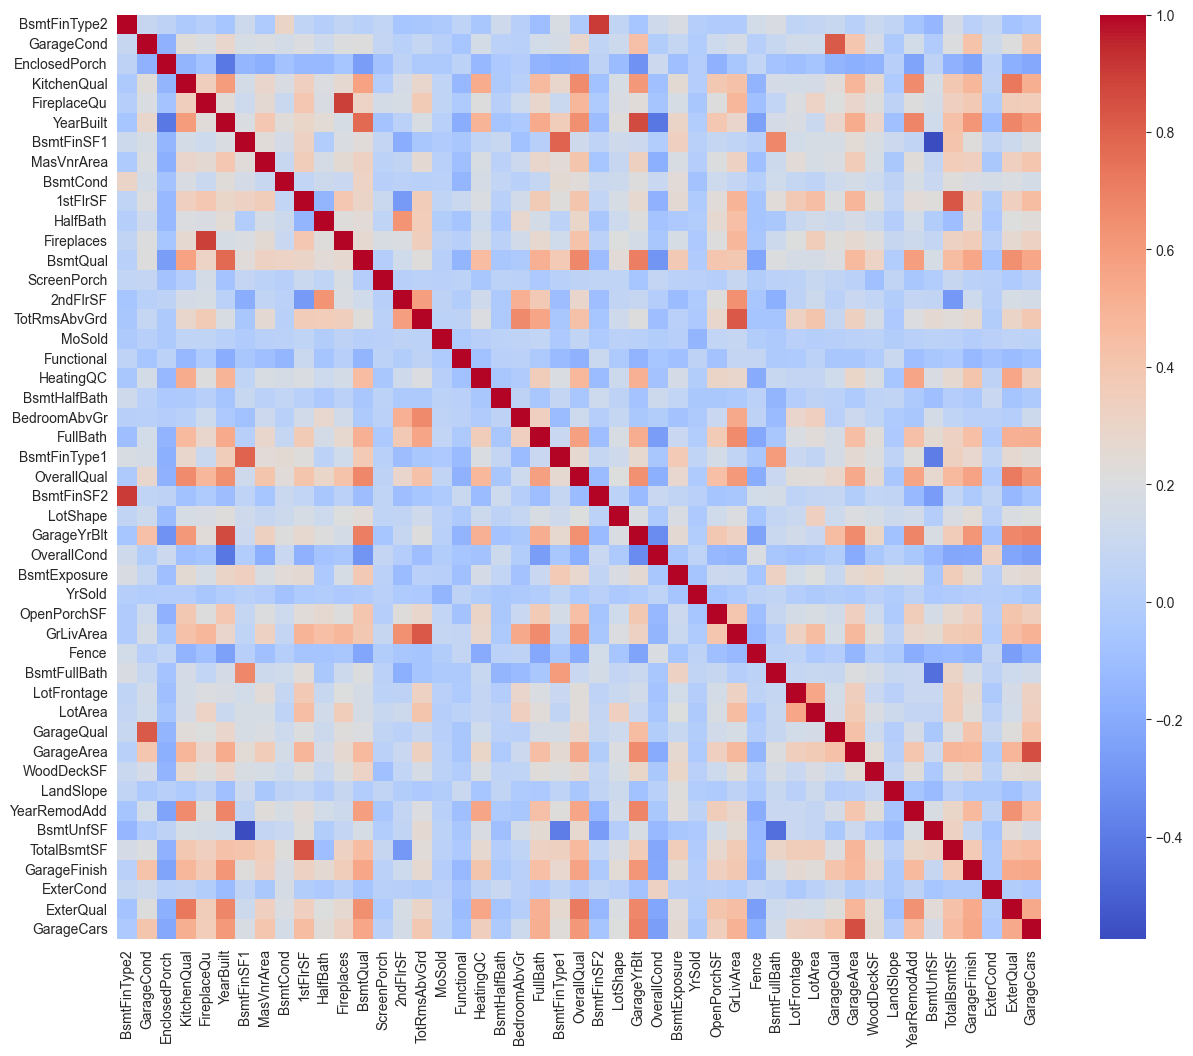

In [33]:
corr = X_prepared[num_vars_prepared].corr(method="spearman")
plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', square=True)

Tsja, we zien hier er daar wel wat donkere vlekken die op hoge correlatie duiden. Maar eigenlijk is het niet goed te doen om deze figuur te interpreteren. We kiezen een andere aanpak. We berekenen van alle combinaties en filteren daar de hoogste correlaties uit.

In [34]:
threshold = 0.7
var1s = []
var2s = []
ccs = []
for permutation in list(itertools.combinations(num_vars_prepared, 2)):
    var1, var2 = permutation[0], permutation[1]
    cc = X_prepared[var1].corr(X_prepared[var2], method="spearman")
    if cc > threshold or cc < -threshold:
        var1s.append(var1)
        var2s.append(var2)
        ccs.append(cc)

corrs_df = pd.DataFrame({"Variabele 1": var1s, "Variabele 2": var2s, "Correlatie coëfficiënt": ccs})
corrs_df.sort_values("Correlatie coëfficiënt", ascending=False)

,Variabele 1,Variabele 2,Correlatie coëfficiënt
0,BsmtFinType2,BsmtFinSF2,0.902542
3,FireplaceQu,Fireplaces,0.895131
5,YearBuilt,GarageYrBlt,0.864371
11,GarageArea,GarageCars,0.853317
7,1stFlrSF,TotalBsmtSF,0.829292
9,TotRmsAbvGrd,GrLivArea,0.827874
1,GarageCond,GarageQual,0.817132
6,BsmtFinSF1,BsmtFinType1,0.795755
4,YearBuilt,BsmtQual,0.774373
2,KitchenQual,ExterQual,0.725266


Hierboven zien we dus combinatie van variabelen met een behoorlijk sterke afhankelijkheid. De meesten zijn wel voor de hand liggend. Bijvoorbeeld GarageArea en GarageCars. Bij machine learning zouden we kunnen proberen bijvoorbeeld GarageCars weg te gooien. Opvallend is de relatie tussen BsmtQual en GarageYrBuilt.

### Relaties tussen categorische variabelen

We kunnen categorische variabelen met elkaar vergelijken met gelabelde staafdiagrammen. Maar er zijn 20 categorische variabelen en dus 190 mogelijke combinaties. Dat is teveel om te bekijken. Net als bij de numerieke variabelen zouden we eigenlijk met een score willen werken. Je zou denken dat de $\chi^2$ test geschikt is, maar dat blijkt weinig inzicht te geven en bovendien behoorlijk wat gedoe. Dus we gaan een beetje rommelen.

We nemen al tweetallen van categorische variabelen. Laten we zeggen var1 en var2. Dan doen we alof var1 een onafhankelijke variabele is en alsof var2 een afhankelijk variabele. Dan proberen we var2 te voorspellen met var1 door een machine learning model voor classificatie toe te passen. We kunnen dan kijken naar de scores van het model voor alle mogelijke combinaties. Statistisch totaal onverantwoord maar je moet wat.

In [35]:
var1s = []
var2s = []
scores = []
model = LogisticRegression(solver="newton-cholesky") # Deze solver is het meest geschikt als X een categorische variabele is.
threshold = 0.9
label_encoder = LabelEncoder()
# We gebruiken permutaties, want de volgorde doet ertoe.
for permutation in list(itertools.permutations(cat_vars_prepared, 2)):
    var1, var2 = permutation[0], permutation[1]

    X_tmp = pd.get_dummies(X_prepared[var1])
    y_tmp = label_encoder.fit_transform(X_prepared[var2])

    model.fit(X_tmp, y_tmp)
    score = model.score(X_tmp, y_tmp)

    if score > threshold:
        var1s.append(var1)
        var2s.append(var2)
        scores.append(score)

classification_scores = pd.DataFrame({"Var1": var1s, "Var2": var2s, "Score": scores})
classification_scores = classification_scores.sort_values("Score", ascending=False)
classification_scores.sort_values("Score", ascending=False)

,Var1,Var2,Score
47,MSSubClass,BldgType,0.969863
48,MSSubClass,HouseStyle,0.957534
10,SaleCondition,SaleType,0.950000
30,Electrical,CentralAir,0.943151
25,LandContour,Alley,0.937671
...,...,...,...
6,Exterior2nd,Electrical,0.914384
77,Neighborhood,MSZoning,0.913699
9,Exterior2nd,Exterior1st,0.910274
0,SaleType,SaleCondition,0.909589


In bovenstaande komen PavedDrive, CentralAir, Electrical en Alley erg vaak voor bij Var2. Merk op dat die net niet gesneuveld zijn bij de LowVarianceDeleter. De lage variantie in combinatie met de vele voorkomens is misschien een reden om ze er alsnog uit te gooien bij machine learning.

Als we die eruit filteren dan krijgen we:

In [36]:
classification_scores[~classification_scores["Var2"].isin(["PavedDrive", "CentralAir", "Electrical", "Alley"])]

,Var1,Var2,Score
47,MSSubClass,BldgType,0.969863
48,MSSubClass,HouseStyle,0.957534
10,SaleCondition,SaleType,0.950000
77,Neighborhood,MSZoning,0.913699
9,Exterior2nd,Exterior1st,0.910274
0,SaleType,SaleCondition,0.909589
65,Exterior1st,Exterior2nd,0.902740


Now we're talking! Dit geeft een aardig en compact overzicht van mogelijke(!) afhankelijkheden tussen de categorische variabelen.

#### MSSubClass

Opvallend is MSSubClass. Als je kijkt naar de data description dan zie je ook dat MSSubClass inhoudelijk min of meer een samenstelling is van BldgType en HouseStyle. Voor machine learning zou het interessant kunnen zijn ofwel MSSubClass ofwel BldgType en HouseStyle te droppen.

Laten we ze ook eens apart bekijken. Opmerking vooraf: MSSubClass is echt nominaal. De getallen zijn codes. Zie de data description.

<Axes: xlabel='MSSubClass', ylabel='count'>

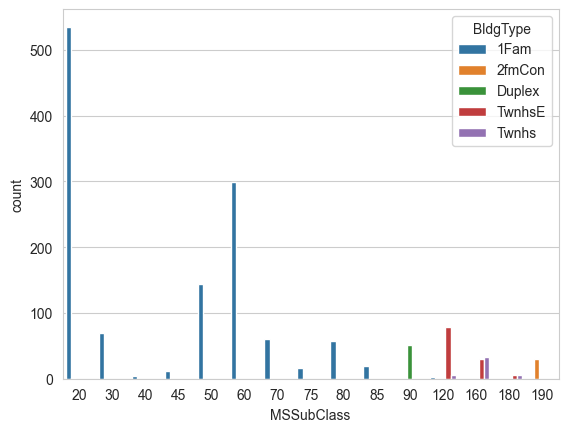

In [37]:
sns.countplot(X_prepared, x="MSSubClass", hue="BldgType")

<Axes: xlabel='MSSubClass', ylabel='count'>

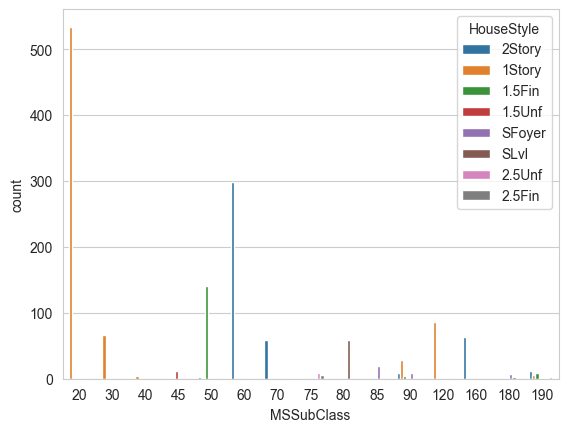

In [38]:
sns.countplot(X_prepared, x="MSSubClass", hue="HouseStyle")

Je moet er een beetje naar staren, maar bij beide grafieken is een sterke (zelfs bijna functionele) afhankelijkheid te zien. Dat is verdere aanleiding om bij een machine learning algoritmen hier de variabelen BldType en HouseStyle te droppen.

#### SaleType en SaleCondition

SaleType en SaleCondition hebben ook een hoge score. Laten we eens kijken.

<Axes: xlabel='SaleType', ylabel='count'>

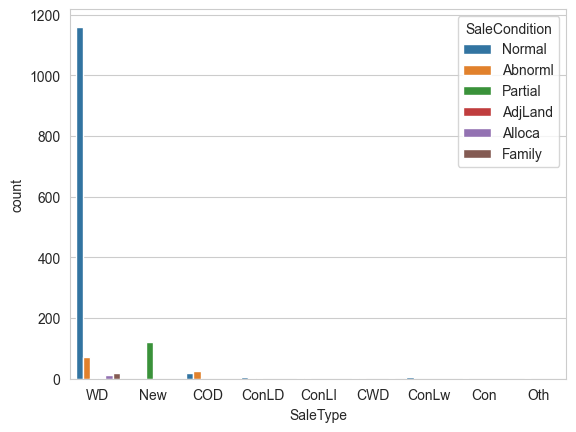

In [39]:
sns.countplot(X_prepared, x="SaleType", hue="SaleCondition")

Ook hier een behoorlijk sterke afhankelijkheid. Dat komt vooral doordat het grootste gedeelte van de data de combinatie WD en Normal heeft.

### Relaties tussen nominale categorische variabelen en numerieke variabelen

Om categorische variabelen met numerieke variabelen te vergelijken kun je boxplots maken. Maar dat zijn er (wederom) erg veel, tegen de 1000. Daarom kijken we weer naar scores. De standaard manier om dit te doen is ANOVA als de numerieke variabele normaal verdeeld is en anders Kruskal-Wallis. Maar ook hier: dit levert niet veel inzicht op en geeft wel een hoop programmeergedoe (wel leuk om te doen overigens). Dus we gaan weer wat rommelen met een classificatiemodel; alleen nu is de onafhankelijke variabele een numerieke variabele. We zouden het ook andersom kunnen doen, dus met een regressiemodel de numerieke variabele voorspellen. Maar vermoedelijk lukt dat toch niet zo goed met maar één onafhankelijke categorische variabele.

In [40]:
var1s = []
var2s = []
scores = []
model = LogisticRegression(solver="liblinear") # Want de standaard lbfgs solver convergeert niet goed voor deze situatie.
threshold = 0.9
label_encoder = LabelEncoder()
for cat_var in cat_vars_prepared:
    for num_var in num_vars_prepared:
        X_tmp = X_prepared[[num_var]]
        y_tmp = label_encoder.fit_transform(X_prepared[cat_var])
        model.fit(X_tmp, y_tmp)
        score = model.score(X_tmp, y_tmp)

        if score > threshold:
            var1s.append(num_var)
            var2s.append(cat_var)
            scores.append(score)

classification_scores = pd.DataFrame({"Var1": var1s, "Var2": var2s, "Score": scores})
classification_scores = classification_scores.sort_values("Score", ascending=False)
classification_scores

,Var1,Var2,Score
25,OverallQual,CentralAir,0.938356
141,ExterQual,Alley,0.937671
128,Fence,Alley,0.937671
120,BsmtFinSF2,Alley,0.937671
121,LotShape,Alley,0.937671
...,...,...,...
76,OverallCond,Electrical,0.914384
50,GarageCond,Electrical,0.914384
51,EnclosedPorch,Electrical,0.913699
1,LandSlope,LandContour,0.903425


Weer veel PavedDrive, CentralAir, Electrical en Alley erg vaak voor bij Var2. Als we ze eruit filteren:

In [41]:
classification_scores[~classification_scores["Var2"].isin(["PavedDrive", "CentralAir", "Electrical", "Alley"])]

,Var1,Var2,Score
1,LandSlope,LandContour,0.903425
0,LotArea,LandContour,0.900685


Dat is overzichtelijker. Misschien zouden we de threshold zelfs iets lager kunnen zetten. We laten het voor nu en kijken naar de twee bovenstaande combinaties.

#### LandSlope en LandContour

Herinnner je dat LandSlope eigenlijk een gecodeerde ordinale variabele is. Daarom vergelijk ik hier liever met een gelabeld staafdiagram.

<Axes: xlabel='LandSlope', ylabel='count'>

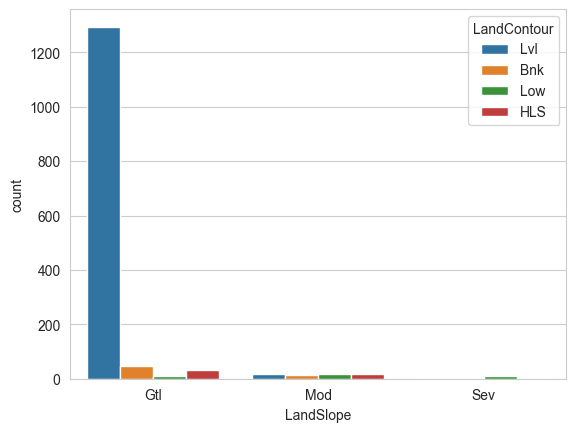

In [42]:
# We nemen de niet geprepareerde X. Dan hebben we mooiere labels.
sns.countplot(X, x="LandSlope", hue="LandContour", order=ord_cat_var_orders["LandSlope"])

Hier lijkt dus te spelen dat de meeste huizen een combinatie van een Gtl (gentle) LandSlope en een LvL (near flat) LandContour. Bij Moderate komen wel alle variaties van LandContour voor, zij het in kleine aantallen.

#### LotArea en LandContour

De LotArea en LandContour vergelijken we in een boxplot.

<Axes: xlabel='LandContour', ylabel='LogLotArea'>

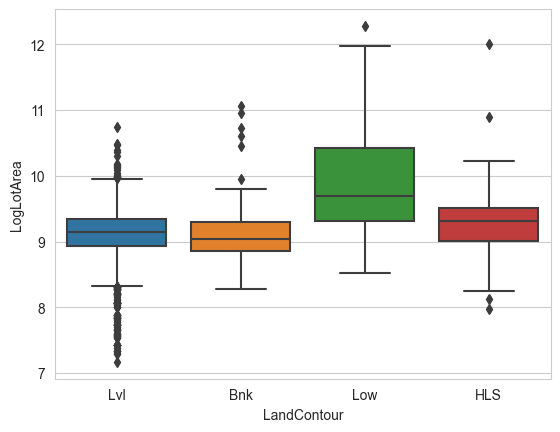

In [43]:
# De grafiek heeft een log transform nodig om leesbaar te zijn.
box_data = X_prepared[["LandContour", "LotArea"]].copy()
box_data["LogLotArea"] = np.log(box_data["LotArea"])
sns.boxplot(box_data, x="LandContour", y="LogLotArea")

De data definition zegt:

LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Het landgoed is bij Low, zeg maar, een kuil. Kennelijk is de LotArea dan groter. Misschien heb je meer ruimte nodig om een huis in een kuil te bouwen?

We hebben nu alle combinaties van onafhankelijke variabelen bekeken. Mogelijk is het een idee een aantal variabelen te droppen op grond van de afhankelijkheden. Of om de LowVarianceVariableDeleter een wat strengere threshold te geven zodat ook PavedDrive, CentralAir, Electrical en Alley sneuvelen. Maar dan nog blijven we met veel variabelen over. Dit verstoort mogelijk het machine learning proces (qua performance en overfitting). Het is daarom misschien interessant om aan dimensionality reduction te denken, bijvoorbeeld met PCA.

Tijd om naar de SalePrice te gaan.

### De afhankelijke variabele SalePrice

De hamvraag is: wat bepaalt de SalePrice? Een eerste aanzet in om van alle onafhankelijke variabelen afzonderlijk te bekijken wat hun relatie is met de SalePrice. We maken daarbij onderscheid tussen numerieke en categorische variabelen.

We doen eerst een log transformatie op de SalePrice zodat we kunnen werken met een normale verdeling. Bovendien maken we een nieuw dataframe met daarin X, y en y_log samen waarmee we dit stuk van de analyse kunnen doen.

<Axes: xlabel='SalePriceLog', ylabel='Count'>

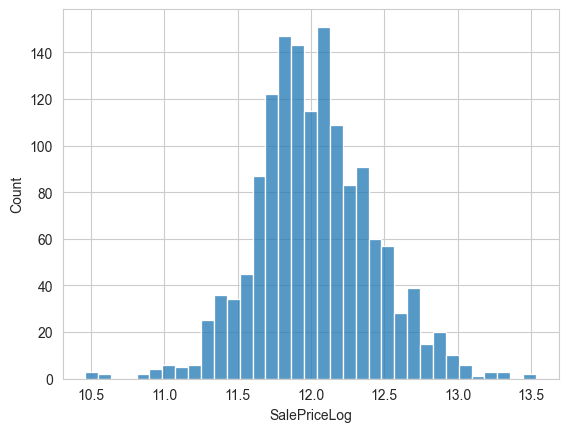

In [44]:
y = ames_housing_data["SalePrice"]
y_log = pd.DataFrame({"SalePriceLog": np.log(ames_housing_data["SalePrice"])})
# Het is fijn om een dataframe te hebben waar X_prepared, y en y_log in zitten.
ames_housing_data_prepared = pd.concat([X_prepared, y, y_log], axis=1)
sns.histplot(ames_housing_data_prepared, x="SalePriceLog")

Prachtig!

We bouwen een functie die grafieken maakt die de onafhankelijke variabelen vergelijkt met de SalePrice.

In [45]:
def plot_y_dependencies(data, vars, var_type, num_cols=5, remove_outliers=False):
    num_rows = len(vars) // num_cols
    # Als het aantal variabelen niet deelbaar is door het aantal kolommen
    # dan is er een extra rij nodig.
    if len(vars) % num_cols != 0:
        num_rows += 1

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(num_cols * 3, num_rows * 4))

    for i, var in enumerate(vars):
        row = i // num_cols
        col = i % num_cols
        if var_type == "num":
            if remove_outliers:
                largest_indices = data.nlargest(columns=var, n=10).index
                # De ~ zorgt ervoor dat we alles nemen behalve de tien grootste.
                sns.regplot(ax=ax[row][col], data=data[~data.index.isin(largest_indices)], x=var, y="SalePriceLog")
        elif var_type == "nom" or var_type == "cat":
            sns.boxplot(ax=ax[row][col], data=data, x=var, y="SalePriceLog")
            # draai de x-labels als er meer dan 5 labels zijn
            if len(ax[row][col].get_xticklabels()) > 5:
                ax[row][col].tick_params(axis='x', labelrotation=90)
        else:
            raise Exception("Unknown var type {}". format(var_type))

### SalePrice en de numerieke variabelen

Hieronder maken we regplots met alle numerieke variabelen als x en de SalePrice als y.

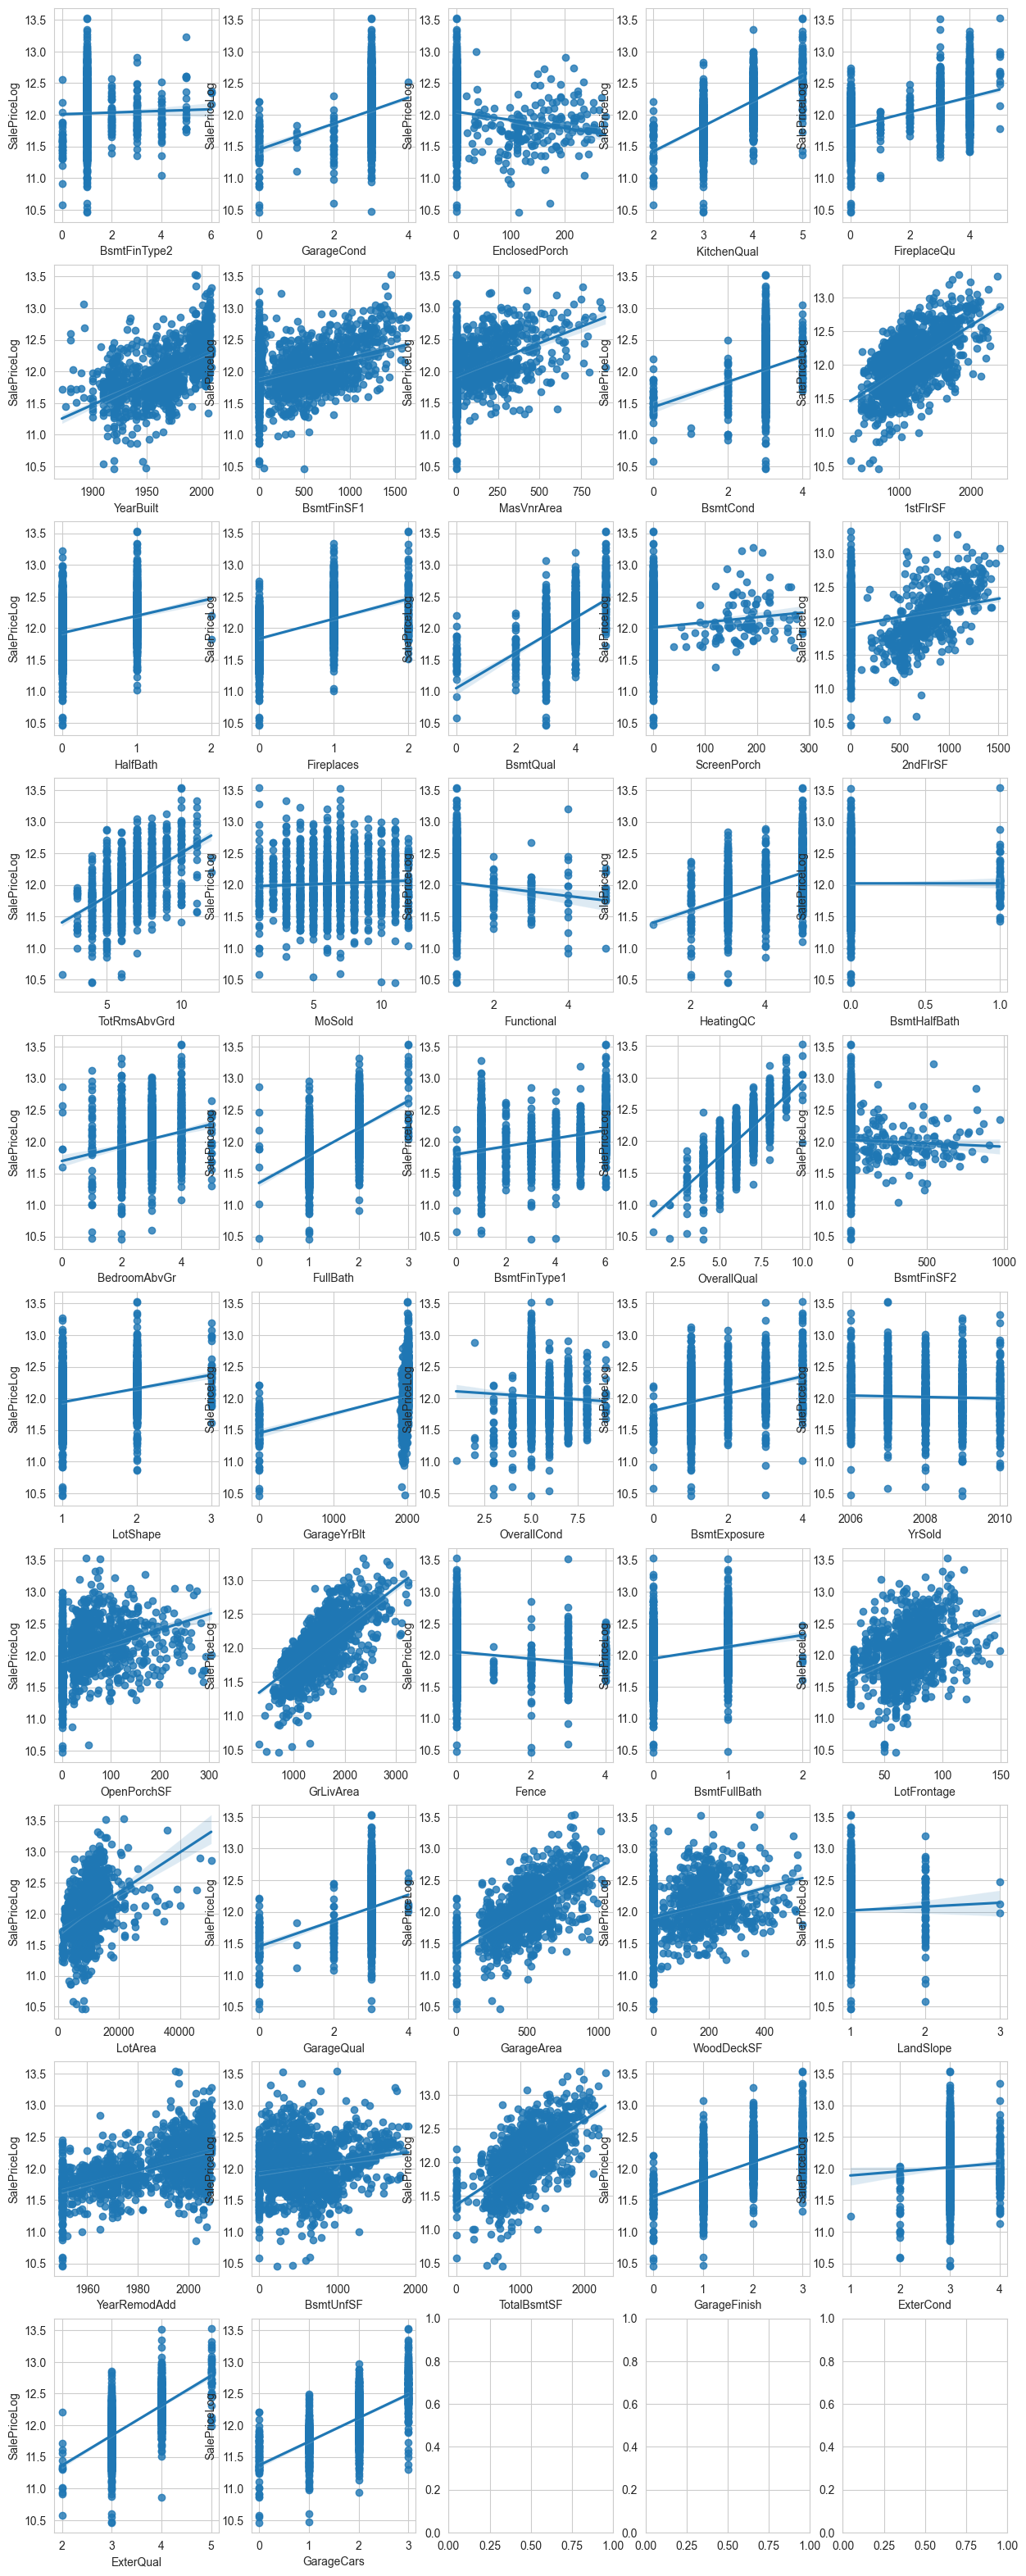

In [46]:
plot_y_dependencies(ames_housing_data_prepared, num_vars_prepared, var_type="num", remove_outliers=True)

Op het oog zijn al aardig wat afhankelijkheden te zien. Bijvoorbeeld bij GrLivArea en OverallQual, wat je ook zou verwachten: hoe groter het woonoppervlakte en hoe beter de kwaliteit hoe duurder het huis.

Laten we ook de correlatie coëfficiënten berekenen en ordenen.

In [47]:
corrs = [y.corr(X_prepared[var], method="spearman")
         for var in num_vars_prepared]

corrs_df = pd.DataFrame({"Variabele": num_vars_prepared, "Correlatie coëfficiënt": corrs})
# We willen sorteren op de absolute waarde, want ook negatieve coëfficiënten
# zijn interessant.
corrs_df["AbsCorr"] = corrs_df["Correlatie coëfficiënt"].abs()
corrs_df.sort_values("AbsCorr", ascending=False)[["Variabele", "Correlatie coëfficiënt"]]

,Variabele,Correlatie coëfficiënt
23,OverallQual,0.809829
31,GrLivArea,0.731310
46,GarageCars,0.690711
45,ExterQual,0.684014
12,BsmtQual,0.678026
3,KitchenQual,0.672849
5,YearBuilt,0.652682
37,GarageArea,0.649379
21,FullBath,0.635957
26,GarageYrBlt,0.634095


Zo je zie: de top 3 meest bepalend: kwaliteit, oppervlakte en aantal auto’s dat je kwijt kunt in je garage. We nemen in herinnering dat GarageCars en GarageArea sterk afhankelijk zijn.

### Saleprice en de categorische variabelen

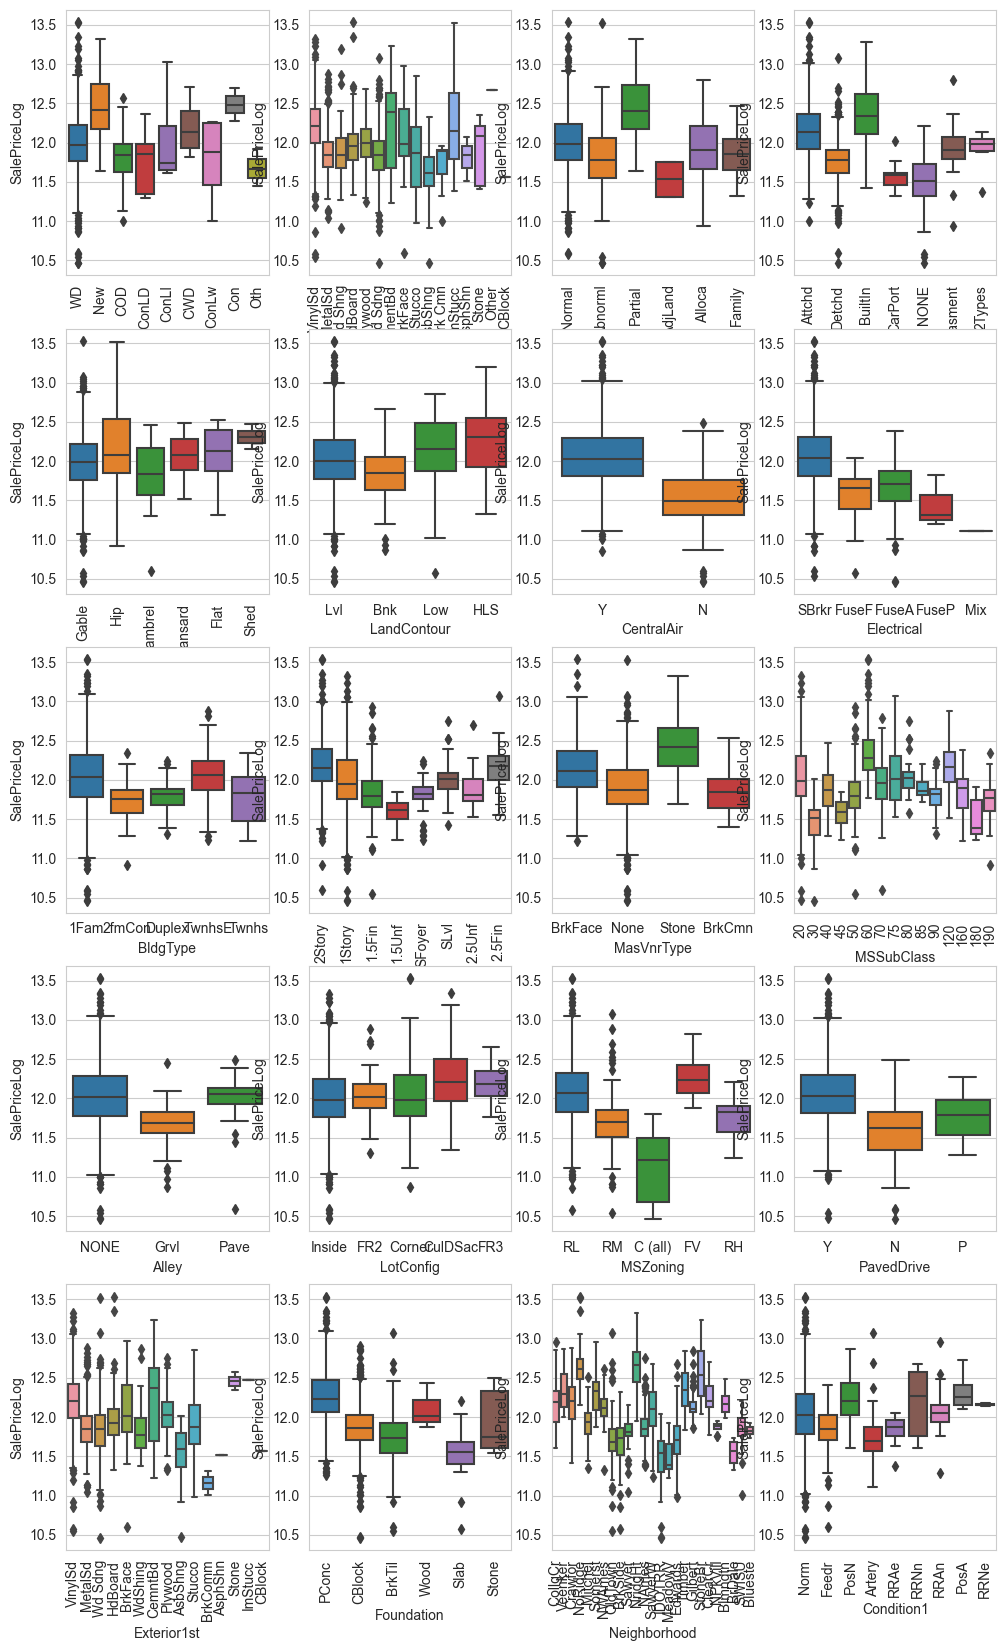

In [48]:
plot_y_dependencies(ames_housing_data_prepared, cat_vars_prepared, var_type="nom", num_cols=4)

Hier is veel afhankelijkheid te zien, maar het is ook moeilijk door de bomen het bos te zien. Wel valt op dat we voor wat betreft de afhankelijkheid met de SalePrice de variabelen PavedDrive en Alley misschien beter als ordinale variabelen hadden kunnen behandelen. Op basis van de beschrijving in data description kan dat ook best. We laten het even voor wat het is.

We willen ook in dit geval rekenen aan de afhankelijkheid. Tijd om er een batterij Kruskis-Wallis testen tegenaan te gooien.

In [49]:
kruskal_stats = []
kruskal_ps = []
for cat_var in cat_vars_prepared:
        # We moeten per waarde van nom_var een lijst maken van de
        # bijbehorende waarden van SalePrice.
        # groups hieronder is een lijst van die lijsten, als volgt opgebouwd:
        # -voor elke mogelijk waarde van de cat_var is er een element in de lijst
        # -dat element is een slice uit het dataframe waar cat_var de betreffende waarde heeft
        # -uit die slice selecteren we de kolom "SalePrice"
        # Zo hebben we de groepen die we willen vergelijken met de Kruskal-Wallis test.
        groups = [ames_housing_data_prepared[
                      ames_housing_data_prepared[cat_var] == val
                  ]["SalePrice"]
                  for val in ames_housing_data_prepared[cat_var].unique()]

        # We filteren groepen eruit die minder dan 5 elementen hebben.
        groups = [group for group in groups if len(group) >= 5]
        # Mogelijk (niet waarschijnlijk, maar toch) is er maar één groep.
        if len(groups) > 1:
            # We kunnen groups unpacken en zo als lijst argumenten meegeven aan de test.
            stat, p = stats.kruskal(*groups)

        kruskal_stats.append(stat)
        kruskal_ps.append(p)

kruskal_df = pd.DataFrame({"Variabele": cat_vars_prepared, "Stat": kruskal_stats, "p-waarde": kruskal_ps})
kruskal_df.sort_values("p-waarde")

,Variabele,Stat,p-waarde
18,Neighborhood,867.255306,2.007824e-168
3,GarageType,532.695615,7.581344e-112
11,MSSubClass,531.388877,3.121080e-105
17,Foundation,488.028509,2.601041e-104
10,MasVnrType,270.812881,2.058731e-58
16,Exterior1st,291.373232,1.761644e-57
14,MSZoning,270.070197,3.080724e-57
1,Exterior2nd,279.225423,1.066926e-52
9,HouseStyle,185.429426,1.388507e-36
2,SaleCondition,162.025672,5.375937e-34


Dat zijn erg kleine p-waarden. We kunnen wel kijken naar de top 3: buurt, het type garage en de MSSubClass. Van MSSubClass hebben we eerder gezien dat het inhoudelijk min of meer een samenstelling is van BldgType en HouseStyle. Een vermoeden: MSSubClass is een typering die makelaars hebben bedacht. Daarin zit dan hun ervaring en intuïtie als het gaat om wat sterk bepalend is voor de huizenprijs.

### SalePrice en de datum variabelen

Ik wil nog kijken naar de datums met name naar YrSold en MoSold. Want samengesteld hebben die ook betekenis. Eerst maak ik een nieuwe kolom met daarin de datum. We kunnen die dan meteen in een grafiek vergelijken met de SalePrice.

<Axes: xlabel='DateSold', ylabel='SalePrice'>

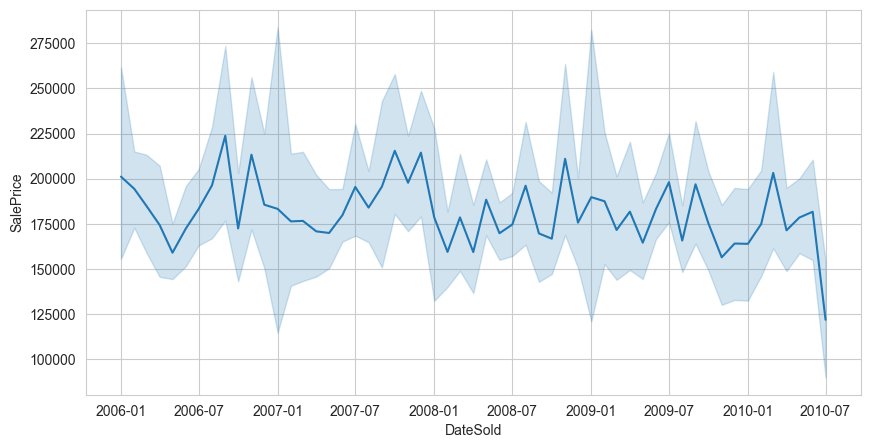

In [50]:
df_w_date = ames_housing_data_prepared.copy()
df_w_date["DateSold"] = pd.to_datetime(df_w_date["YrSold"].astype(int).astype(str) + '-' +
                                       df_w_date["MoSold"].astype(int).astype(str) + '-01')

plt.figure(figsize=(10, 5))
sns.lineplot(df_w_date, x="DateSold", y="SalePrice")

En dan zijn we in de wondere wereld van de time series. Want we zien iets dat lijkt op seizoensschommelingen. Dat geeft een hele nieuwe dimensie aan het voorspellen van de SalePrice met machine learning. Voor nu is het in ieder geval goed om de variabelen YrSold en MoSold apart te houden. Dat is ook wel aardig om in grafieken te zien.

<Axes: xlabel='YrSold', ylabel='SalePrice'>

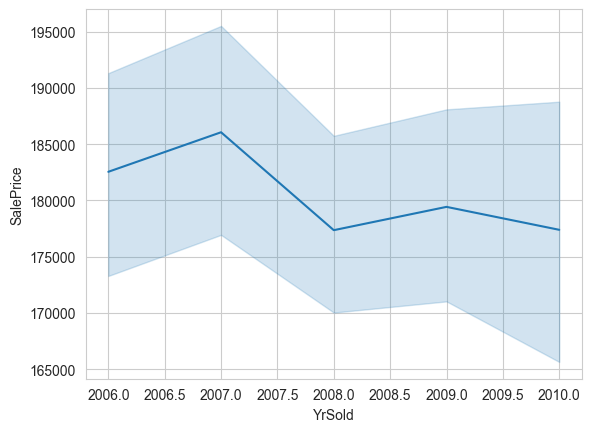

In [51]:
sns.lineplot(ames_housing_data_prepared, x="YrSold", y="SalePrice")

Vier jaar is niet zoveel als het om huizenprijzen gaat. We lijken hier een dalende trend te zien. Houd in de gedachte dat het voorspellen van de huizenprijs in de tijd lastig is. Laten we ook naar de maanden kijken.

<Axes: xlabel='MoSold', ylabel='SalePriceLog'>

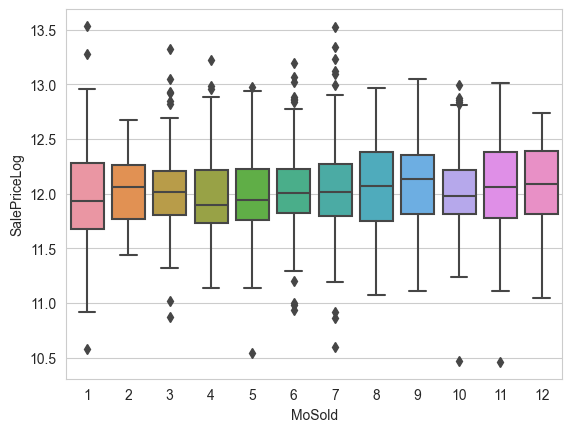

In [52]:
sns.boxplot(ames_housing_data_prepared, x="MoSold", y="SalePriceLog")

Op grond van bovenstaande grafiek zou ik voor het voorspellen van de SalePrice de variabele MoSold ofwel weggooien ofwel als een categorische variabele behandelen. Er lijkt overigens een lichte golfbeweging zichtbaar. Ik vermoed dat het niet de moeite loont om dit verband uit te werken (met bijvoorbeeld een time series model zoals ARIMA).

Hiermee ronden we het bekijken van de relatie tussen de onafhankelijke variabelen en de SalePrice af en zijn we ook klaar met de verkennende analyse.

## Conclusie

We hebben gaandeweg best veel observaties gedaan die helpend zijn als we met een regressiemodel de SalePrice willen voorspellen. Hieronder geef ik een opsomming:

1) We hebben aanvankelijk een opdeling gemaakt in: nominale variabelen, ordinale categorische variabelen, ordinale numerieke variabelen, numerieke ratio variabelen, en datum variabelen. Door de ordinale variabelen te coderen (met een Estimator-Transformer) en de datumvelden te behandelen als numerieke variabelen zijn we op het eind overgebleven met twee soorten variabelen: categorisch en numeriek. Dat is fijn als we gaan machine learnen.
2) Er zijn missing values. Soms heeft een missing value betekenis. Bijvoorbeeld bij GarageType dat er geen garage is. Soms is de waarde simpelweg onbekend. Dat heeft impact op de strategie om missing values op te vullen. We hebben een Estimator-Transformer gemaakt waarin die strategie is verwerkt.
3) We hebben gezien dat er een aantal variabelen zijn die bijna altijd dezelfde waarde hebben, bijvoorbeeld Utilities. Deze variabelen kunnen we bij machine learning beter weggooien. We hebben een LowVarianceVariableDeleter Estimator-Transformer gemaakt die variabelen boven een bepaalde threshold weggooien. Later in de analyse hebben gezien dat we de misschien wel een wat strengere (lagere) threshold willen geven zodat ook PavedDrive, CentralAir, Electrical en Alley eruit gaan.
4) We hebben alle Estimator-Transformer achter elkaar gezet in een pipeline. Die is bruikbaar voor machine learning. Het is wel nodig er nog wat stappen aan toe te voegen. In ieder geval scaling, maar ook mogelijk ook hyperparametriseerbare data preparation stappen op basis van de inzichten in deze verkennende analyse.
4) De meeste ordinale variabelen zijn na codering niet normaal verdeeld. Wellicht zijn deze beter te scalen met een MinMaxScaler dan met een StandardScaler.
5) Een flink aantal numerieke variabelen zijn rechts-scheef verdeeld. Het is waarschijnlijk verstandig om daar een log transformatie op te doen. Dat zou kunnen met een Estimator-Transformer die dit doet voor variabelen met een scheefheid boven een bepaalde threshold.
6) In het bijzonder is ook de afhankelijke variabele SalePrice rechts-scheef verdeeld. Het is mogelijk verstandig om ook daar een log transformatie op te doen. Dan voorspel je met machine learning de logaritme van de SalePrice. Om de echte SalePrice terug te kijken moet je terug machtsverheffen.
6) Een flink aantal numerieke variabelen heeft veel 0 waarden, bijvoorbeeld GarageArea. Dat is dan, in het voorbeeld, omdat er geen garage is. Die 0 waarden verstoren de normale verdeling. Het is mogelijk interessant om die 0-waarden te vervangen met de mediaan. Er is dan wel aandacht nodig om te kijken of er geen informatie verloren gaat. Bij GarageArea gaat het goed, omdat ook uit GarageType is af te leiden of er wel/niet een garage is. Voor de andere variabelen met veel 0-waarden is dat een uitzoekpunt.
7) Er zijn veel afhankelijkheden tussen variabelen. Die staan in lijstjes geordend op p-waardes of andere scores. Statistisch gezien is het aangetoonde verband wat dubieus. Maar we hebben wel wat aanknopingspunten om eventueel variabelen te droppen.
8) Omdat we veel variabelen hebben en nou ook weer niet zo ontzettend veel kandidaten hebben gevonden om te droppen is het mogelijk interessant om naar dimensionality reduction te kijken, bijvoorbeeld met PCA.
9) We hebben gekeken naar de onafhankelijke variabelen die het meest bepalend zijn voor de SalePrice. Dat zijn de numerieke variabelen OverallQual, GrLivArea en GarageCars en de categorische variabelen Neighborhood, GarageType, MSSubclass en Foundation. We vermoeden daarbij dat er in MSSubclass ervaring van makelaars zit verstopt.
10) Het lijkt erop dat we PavedDrive en Alley misschien beter als ordinale variabelen hadden kunnen behandelen.
10) Als we YrSold en MoSold combineren tot een datum en dat vervolgens vergelijken met de SalePrice dan lijkt het erop dat er seizoensschommelingen zichtbaar zijn. Daarom is het goed deze variabelen apart te houden. MoSold kan mogelijk gedropt worden of behandeld als categorische variabele.